# Imports

In [67]:
import warnings
warnings.filterwarnings('ignore')

# Data manipulation
import pandas as pd
import numpy as np
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, LabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Classification models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Regression models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Neural networks
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Metrics and evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, classification_report, mean_squared_error, 
    mean_absolute_error, r2_score, roc_auc_score, roc_curve, auc
)
# Add MinMaxScaler for normalization
from sklearn.preprocessing import MinMaxScaler

# Display settings
pd.set_option('display.max_columns', None)


In [2]:
csv_path = 'archive/'
data_dicts = {csv_name[:-4]: pd.read_csv(csv_path+csv_name) for csv_name in os.listdir(csv_path)}

In [3]:
data_dicts.keys()

dict_keys(['assessments', 'courses', 'studentAssessment', 'studentInfo', 'studentRegistration', 'studentVle', 'vle'])

In [4]:
def show_data_info(df):
    print(40 * "=" , "head" ,40 * "="  )
    print(df.head())
    print(40 * "=", "shape" ,40 * "=" )
    print(df.shape)
    print(40 * "=", "info" ,40 * "=" )
    print(df.info())
    print(40 * "=", "describe" ,40 * "=" )
    print(df.describe())
    print(100 * "=" )

In [5]:
show_data_info(data_dicts["studentInfo"])

======================================== head ========================================
  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   
3         AAA             2013J       31604      F     South East Region   
4         AAA             2013J       32885      F  West Midlands Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   30-40%    35-55                     0   
3  A Level or Equivalent   50-60%    35-55                     0   
4     Lower Than A Level   50-60%     0-35                     0   

   studied_credits disability final_result  
0 

In [6]:
show_data_info(data_dicts["assessments"])

======================================== head ========================================
  code_module code_presentation  id_assessment assessment_type   date  weight
0         AAA             2013J           1752             TMA   19.0    10.0
1         AAA             2013J           1753             TMA   54.0    20.0
2         AAA             2013J           1754             TMA  117.0    20.0
3         AAA             2013J           1755             TMA  166.0    20.0
4         AAA             2013J           1756             TMA  215.0    30.0
======================================== shape ========================================
(206, 6)
======================================== info ========================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_pre

In [7]:
show_data_info(data_dicts["courses"])

======================================== head ========================================
  code_module code_presentation  module_presentation_length
0         AAA             2013J                         268
1         AAA             2014J                         269
2         BBB             2013J                         268
3         BBB             2014J                         262
4         BBB             2013B                         240
======================================== shape ========================================
(22, 3)
======================================== info ========================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null

In [8]:
show_data_info(data_dicts["studentAssessment"])

======================================== head ========================================
   id_assessment  id_student  date_submitted  is_banked  score
0           1752       11391              18          0   78.0
1           1752       28400              22          0   70.0
2           1752       31604              17          0   72.0
3           1752       32885              26          0   69.0
4           1752       38053              19          0   79.0
======================================== shape ========================================
(173912, 5)
======================================== info ========================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_

In [9]:
show_data_info(data_dicts["studentRegistration"])

======================================== head ========================================
  code_module code_presentation  id_student  date_registration  \
0         AAA             2013J       11391             -159.0   
1         AAA             2013J       28400              -53.0   
2         AAA             2013J       30268              -92.0   
3         AAA             2013J       31604              -52.0   
4         AAA             2013J       32885             -176.0   

   date_unregistration  
0                  NaN  
1                  NaN  
2                 12.0  
3                  NaN  
4                  NaN  
======================================== shape ========================================
(32593, 5)
======================================== info ========================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------           

In [10]:
show_data_info(data_dicts["studentVle"])

======================================== head ========================================
  code_module code_presentation  id_student  id_site  date  sum_click
0         AAA             2013J       28400   546652   -10          4
1         AAA             2013J       28400   546652   -10          1
2         AAA             2013J       28400   546652   -10          1
3         AAA             2013J       28400   546614   -10         11
4         AAA             2013J       28400   546714   -10          1
======================================== shape ========================================
(10655280, 6)
======================================== info ========================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4  

In [11]:
show_data_info(data_dicts["vle"])

======================================== head ========================================
   id_site code_module code_presentation activity_type  week_from  week_to
0   546943         AAA             2013J      resource        NaN      NaN
1   546712         AAA             2013J     oucontent        NaN      NaN
2   546998         AAA             2013J      resource        NaN      NaN
3   546888         AAA             2013J           url        NaN      NaN
4   547035         AAA             2013J      resource        NaN      NaN
======================================== shape ========================================
(6364, 6)
======================================== info ========================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364

# Data Cleaning

Data Cleaning Summary

1. ✅ Dealt with Missing Values.
2. ✅ Figured out Why the Data is Missing.
3. ✅ Eliminated All Extra Variables.
4. ✅ Eliminated Duplicates.
5. ✅ Detected and Removed Outliers (using Box Plot).
6. ✅ Scaling and Normalization (done in Modeling Section).
7. ✅ Eliminated Blank Spaces or Missing Information (handled using SimpleImputer).
8. ✅ Arranged Data Logically and Sequentially (handled in EDA Section).
9. ✅ Grouped Data Properly for Visualization (handled in EDA Section).
10. ✅ Dealing with Inconsistent Data Entry — **Not a case in this dataset**.


#####  Merge 

In [12]:
# unpacking the data_dicts
studentInfo_df = data_dicts['studentInfo']
studentRegistration_df = data_dicts['studentRegistration']
studentAssessment_df = data_dicts['studentAssessment']
assessments_df = data_dicts['assessments']
studentVle_df = data_dicts['studentVle']
vle_df = data_dicts['vle']
courses_df = data_dicts['courses']

In [13]:
def merge_educational_data(studentInfo_df, studentRegistration_df, studentAssessment_df, assessments_df, 
                           studentVle_df, vle_df, courses_df, 
                           score_deadline, click_deadline, withdraw_deadline):
    
    # Merge student information with their registration details and filter withdrawals
    student_df = pd.merge(studentInfo_df, studentRegistration_df, 
                          on=['code_module', 'code_presentation', 'id_student'], 
                          how='left')
    student_df = student_df[(student_df['date_unregistration'].isnull()) | 
                            (student_df['date_unregistration'] > withdraw_deadline)]

    
    # Merge student assessments with assessment details
    assessments_combined_df = pd.merge(studentAssessment_df, assessments_df, 
                                       on='id_assessment', 
                                       how='left')

    
    # Merge the student info and assessments dataframes
    student_assessments_df = pd.merge(student_df, assessments_combined_df, 
                                      on=['id_student', 'code_module', 'code_presentation'], 
                                      how='left')

    
    # Merge the student VLE interactions with the VLE details
    student_vle_combined_df = pd.merge(studentVle_df, vle_df, 
                                       on=['id_site', 'code_module', 'code_presentation'], 
                                       how='left')

    
    # Aggregate the VLE interaction data at the student-module-presentation level
    vle_agg_df = student_vle_combined_df.groupby(['id_student', 'code_module', 'code_presentation']).agg(
        total_clicks=pd.NamedAgg(column='sum_click', aggfunc='sum')
    ).reset_index()

    # Merge the aggregated VLE data with the student assessments dataframe
    final_df = pd.merge(student_assessments_df, vle_agg_df, 
                        on=['id_student', 'code_module', 'code_presentation'], 
                        how='left')

    # Merge the course details with the final dataframe
    final_df = pd.merge(final_df, courses_df, 
                        on=['code_module', 'code_presentation'], 
                        how='left')
    # Calculate final scores before filtering by deadline
    # First, ensure weights don't sum to more than 100 per student
    final_scores = final_df.groupby(['code_module', 'code_presentation', 'id_student']).apply(
        lambda x: (x['score'].clip(upper=100).astype(float) * 
                  (x['weight'] / x['weight'].sum() * 100 if x['weight'].sum() > 100 else x['weight']) / 100).sum()
    ).reset_index(name='final_score')

    # Merge back with original dataframe
    final_df = final_df.merge(final_scores, on=['code_module', 'code_presentation', 'id_student'])
    
    # Now filter assessments and VLE interactions up to the deadlines
    final_df = final_df[final_df['date_submitted'] <= score_deadline]
    final_df = final_df[final_df['date'] <= click_deadline]
    
    # Drop rows where final_result is 'Withdrawn'
    final_df = final_df[final_df['final_result'] != 'Withdrawn']

    # Replace 'Distinction' with 'Pass'
    final_df['final_result'] = final_df['final_result'].replace('Distinction', 'Pass')
    # # Keep only 'Pass' or 'Fail' in the 'final_result' column
    final_df = final_df[final_df['final_result'].isin(['Pass', 'Fail'])]

    return final_df

In [14]:
score_deadline=click_deadline=withdraw_deadline = 120
final_df = merge_educational_data(studentInfo_df, studentRegistration_df, studentAssessment_df, 
                                         assessments_df, studentVle_df, vle_df, courses_df, 
                                         score_deadline, click_deadline, withdraw_deadline)

In [15]:
final_df.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'date_registration',
       'date_unregistration', 'id_assessment', 'date_submitted', 'is_banked',
       'score', 'assessment_type', 'date', 'weight', 'total_clicks',
       'module_presentation_length', 'final_score'],
      dtype='object')

##### drop useless cols 

In [16]:
final_df = final_df.drop(["date_registration" , "date_unregistration"],axis=1)

In [17]:
final_df = final_df.drop(["imd_band"],axis=1)

##### deal with nan

In [18]:
final_df.isna().mean()

code_module                   0.000000
code_presentation             0.000000
id_student                    0.000000
gender                        0.000000
region                        0.000000
highest_education             0.000000
age_band                      0.000000
num_of_prev_attempts          0.000000
studied_credits               0.000000
disability                    0.000000
final_result                  0.000000
id_assessment                 0.000000
date_submitted                0.000000
is_banked                     0.000000
score                         0.000365
assessment_type               0.000000
date                          0.000000
weight                        0.000000
total_clicks                  0.001181
module_presentation_length    0.000000
final_score                   0.000000
dtype: float64

In [19]:
final_df[final_df["weight"].isna()]

Empty DataFrame
Columns: [code_module, code_presentation, id_student, gender, region, highest_education, age_band, num_of_prev_attempts, studied_credits, disability, final_result, id_assessment, date_submitted, is_banked, score, assessment_type, date, weight, total_clicks, module_presentation_length, final_score]
Index: []

In [20]:
final_df = final_df.dropna(subset=['score', 'weight',"date"])

In [ ]:
final_df.isna().sum()

code_module                    0
code_presentation              0
id_student                     0
gender                         0
region                         0
highest_education              0
age_band                       0
num_of_prev_attempts           0
studied_credits                0
disability                     0
final_result                   0
id_assessment                  0
date_submitted                 0
is_banked                      0
score                          0
assessment_type                0
date                           0
weight                         0
total_clicks                  80
module_presentation_length     0
final_score                    0
dtype: int64

In [22]:
final_df['total_clicks'] = final_df['total_clicks'].fillna(final_df['total_clicks'].mean())


In [23]:
final_df.isna().sum()

code_module                   0
code_presentation             0
id_student                    0
gender                        0
region                        0
highest_education             0
age_band                      0
num_of_prev_attempts          0
studied_credits               0
disability                    0
final_result                  0
id_assessment                 0
date_submitted                0
is_banked                     0
score                         0
assessment_type               0
date                          0
weight                        0
total_clicks                  0
module_presentation_length    0
final_score                   0
dtype: int64

id_assessment, date_submitted, score, etc. are missing because some students registered but never submitted anything → no assessment = no score = no submission date.

##### Remove duplicates

In [24]:
duplicated_count = final_df.duplicated().sum()
print(f"Number of duplicated rows: {duplicated_count}")

Number of duplicated rows: 0


In [25]:
final_df.head(3)

code_module code_presentation  id_student gender               region  \
0         AAA             2013J       11391      M  East Anglian Region   
1         AAA             2013J       11391      M  East Anglian Region   
2         AAA             2013J       11391      M  East Anglian Region   

  highest_education age_band  num_of_prev_attempts  studied_credits  \
0  HE Qualification     55<=                     0              240   
1  HE Qualification     55<=                     0              240   
2  HE Qualification     55<=                     0              240   

  disability final_result  id_assessment  date_submitted  is_banked  score  \
0          N         Pass         1752.0            18.0        0.0   78.0   
1          N         Pass         1753.0            53.0        0.0   85.0   
2          N         Pass         1754.0           115.0        0.0   80.0   

  assessment_type   date  weight  total_clicks  module_presentation_length  \
0             TMA   19.0    10.0         934.0                         268   
1             TMA   54.0    20.0         934.0                         268   
2             TMA  117.0    20.0         934.0                         268   

   final_score  
0         82.4  
1         82.4  
2         82.4

##### Encode catigorical cols


In [26]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68538 entries, 0 to 170576
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module                 68538 non-null  object 
 1   code_presentation           68538 non-null  object 
 2   id_student                  68538 non-null  int64  
 3   gender                      68538 non-null  object 
 4   region                      68538 non-null  object 
 5   highest_education           68538 non-null  object 
 6   age_band                    68538 non-null  object 
 7   num_of_prev_attempts        68538 non-null  int64  
 8   studied_credits             68538 non-null  int64  
 9   disability                  68538 non-null  object 
 10  final_result                68538 non-null  object 
 11  id_assessment               68538 non-null  float64
 12  date_submitted              68538 non-null  float64
 13  is_banked                   68538 n

In [27]:
final_df.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'id_assessment',
       'date_submitted', 'is_banked', 'score', 'assessment_type', 'date',
       'weight', 'total_clicks', 'module_presentation_length', 'final_score'],
      dtype='object')

In [28]:
if not os.path.exists('encoders'):
    os.makedirs('encoders')
encoders = {}

In [29]:
cols_to_be_encoded = ['code_module', 'code_presentation','gender', 'region','highest_education', 'age_band',
                     'disability' , 'final_result','assessment_type']

In [30]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68538 entries, 0 to 170576
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module                 68538 non-null  object 
 1   code_presentation           68538 non-null  object 
 2   id_student                  68538 non-null  int64  
 3   gender                      68538 non-null  object 
 4   region                      68538 non-null  object 
 5   highest_education           68538 non-null  object 
 6   age_band                    68538 non-null  object 
 7   num_of_prev_attempts        68538 non-null  int64  
 8   studied_credits             68538 non-null  int64  
 9   disability                  68538 non-null  object 
 10  final_result                68538 non-null  object 
 11  id_assessment               68538 non-null  float64
 12  date_submitted              68538 non-null  float64
 13  is_banked                   68538 n

##### Calculate weighted scores and sum them for each student in each module

<Axes: >

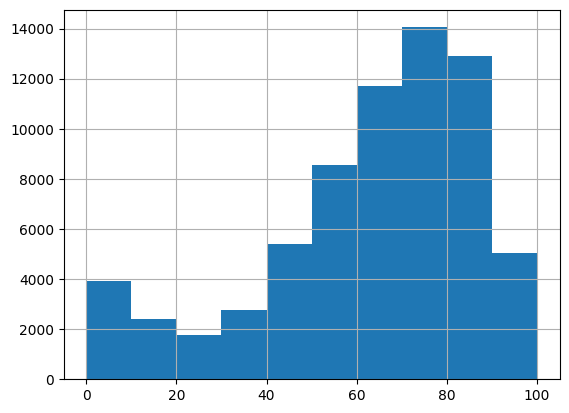

In [31]:
final_df["final_score"].hist()

##### detect and remove outliers

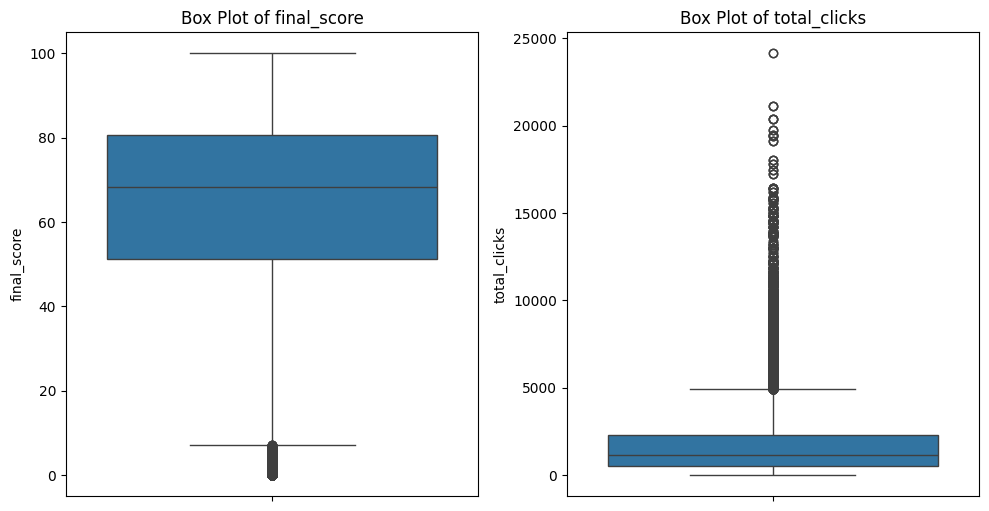

Original dataset shape: (68538, 21)
Dataset shape after removing outliers: (67338, 21)


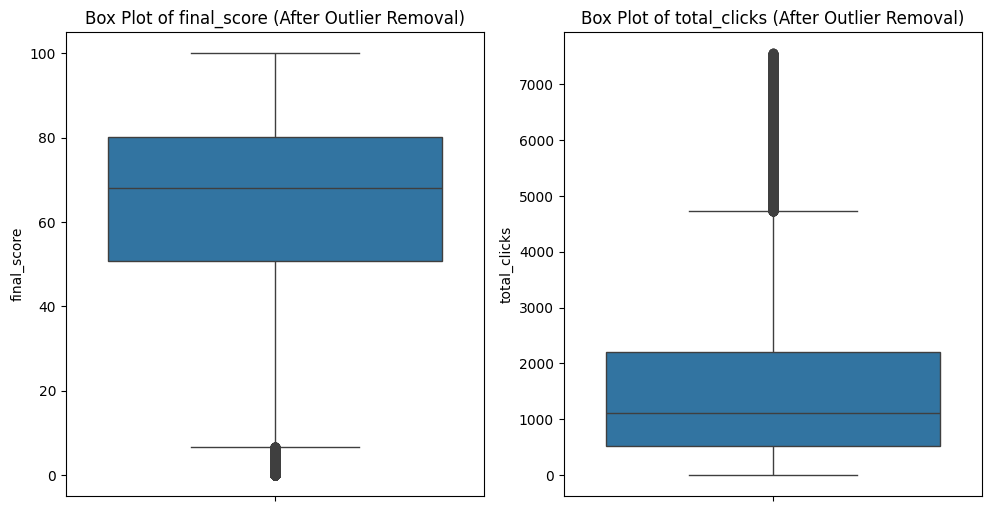

In [32]:
# Select numerical columns for outlier detection
numerical_cols = ['final_score',  'total_clicks']

# Create box plots to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=final_df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3.0 * IQR 
    upper_bound = Q3 + 3.0 * IQR  
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from selected columns
print(f"Original dataset shape: {final_df.shape}")

for col in numerical_cols:
    if col not in ['num_of_prev_attempts', 'studied_credits']:  # Keep these as they might be important features
        final_df = remove_outliers(final_df, col)
        
print(f"Dataset shape after removing outliers: {final_df.shape}")

# Visualize the data after removing outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=final_df[col])
    plt.title(f'Box Plot of {col} (After Outlier Removal)')
plt.tight_layout()
plt.show()


# EDA

In [33]:
final_df.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'id_assessment',
       'date_submitted', 'is_banked', 'score', 'assessment_type', 'date',
       'weight', 'total_clicks', 'module_presentation_length', 'final_score'],
      dtype='object')

In [34]:
final_df_cat = final_df[['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'id_assessment',
       'date_submitted', 'is_banked', 'score', 'assessment_type', 'date',
       'weight', 'total_clicks', 'module_presentation_length','final_score']]

In [35]:
final_df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67338 entries, 0 to 170576
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module                 67338 non-null  object 
 1   code_presentation           67338 non-null  object 
 2   id_student                  67338 non-null  int64  
 3   gender                      67338 non-null  object 
 4   region                      67338 non-null  object 
 5   highest_education           67338 non-null  object 
 6   age_band                    67338 non-null  object 
 7   num_of_prev_attempts        67338 non-null  int64  
 8   studied_credits             67338 non-null  int64  
 9   disability                  67338 non-null  object 
 10  final_result                67338 non-null  object 
 11  id_assessment               67338 non-null  float64
 12  date_submitted              67338 non-null  float64
 13  is_banked                   67338 n

In [36]:
final_df_cat

code_module code_presentation  id_student gender               region  \
0              AAA             2013J       11391      M  East Anglian Region   
1              AAA             2013J       11391      M  East Anglian Region   
2              AAA             2013J       11391      M  East Anglian Region   
5              AAA             2013J       28400      F             Scotland   
6              AAA             2013J       28400      F             Scotland   
...            ...               ...         ...    ...                  ...   
170539         GGG             2014J     2606765      F        London Region   
170548         GGG             2014J     2620947      F             Scotland   
170558         GGG             2014J     2645731      F  East Anglian Region   
170567         GGG             2014J     2648187      F         South Region   
170576         GGG             2014J     2684003      F     Yorkshire Region   

            highest_education age_band  num_of_prev_attempts  studied_credits  \
0            HE Qualification     55<=                     0              240   
1            HE Qualification     55<=                     0              240   
2            HE Qualification     55<=                     0              240   
5            HE Qualification    35-55                     0               60   
6            HE Qualification    35-55                     0               60   
...                       ...      ...                   ...              ...   
170539     Lower Than A Level     0-35                     0               30   
170548  A Level or Equivalent     0-35                     0               30   
170558     Lower Than A Level    35-55                     0               30   
170567  A Level or Equivalent     0-35                     0               30   
170576       HE Qualification    35-55                     0               30   

       disability final_result  id_assessment  date_submitted  is_banked  \
0               N         Pass         1752.0            18.0        0.0   
1               N         Pass         1753.0            53.0        0.0   
2               N         Pass         1754.0           115.0        0.0   
5               N         Pass         1752.0            22.0        0.0   
6               N         Pass         1753.0            52.0        0.0   
...           ...          ...            ...             ...        ...   
170539          N         Pass        37435.0            61.0        0.0   
170548          Y         Pass        37435.0            60.0        0.0   
170558          N         Pass        37435.0            68.0        0.0   
170567          Y         Pass        37435.0            50.0        0.0   
170576          N         Pass        37435.0            37.0        0.0   

        score assessment_type   date  weight  total_clicks  \
0        78.0             TMA   19.0    10.0         934.0   
1        85.0             TMA   54.0    20.0         934.0   
2        80.0             TMA  117.0    20.0         934.0   
5        70.0             TMA   19.0    10.0        1435.0   
6        68.0             TMA   54.0    20.0        1435.0   
...       ...             ...    ...     ...           ...   
170539   55.0             TMA   61.0     0.0         236.0   
170548   80.0             TMA   61.0     0.0         476.0   
170558   80.0             TMA   61.0     0.0         893.0   
170567   65.0             TMA   61.0     0.0         312.0   
170576   80.0             TMA   61.0     0.0         616.0   

        module_presentation_length  final_score  
0                              268         82.4  
1                              268         82.4  
2                              268         82.4  
5                              268         65.4  
6                              268         65.4  
...                            ...          ...  
170539                         269          0.0  
170548         

##### Course-Level Overview

In [37]:
# Count unique courses
course_counts = final_df_cat.groupby(['code_module', 'code_presentation']).size().reset_index(name='count')
print("\nNumber of unique courses:", len(course_counts))
print("\nCourses and their details:")
print(course_counts)


Number of unique courses: 22

Courses and their details:
   code_module code_presentation  count
0          AAA             2013J    885
1          AAA             2014J    765
2          BBB             2013B   5151
3          BBB             2013J   6677
4          BBB             2014B   6202
5          BBB             2014J   4178
6          CCC             2014B   3007
7          CCC             2014J   4551
8          DDD             2013B   5713
9          DDD             2013J   3319
10         DDD             2014B   2371
11         DDD             2014J   4215
12         EEE             2013J   1436
13         EEE             2014B   1229
14         EEE             2014J   1599
15         FFF             2013B   3033
16         FFF             2013J   4040
17         FFF             2014B   2571
18         FFF             2014J   3948
19         GGG             2013J    750
20         GGG             2014B   1151
21         GGG             2014J    547


In [38]:
# Count assessments per course
assessment_counts = final_df_cat.groupby(['code_module', 'code_presentation'])['id_assessment'].nunique().reset_index()
print("\nNumber of assessments per course:")
print(assessment_counts)


Number of assessments per course:
   code_module code_presentation  id_assessment
0          AAA             2013J              3
1          AAA             2014J              3
2          BBB             2013B              5
3          BBB             2013J              5
4          BBB             2014B              7
5          BBB             2014J              3
6          CCC             2014B              4
7          CCC             2014J              4
8          DDD             2013B              8
9          DDD             2013J              3
10         DDD             2014B              4
11         DDD             2014J              4
12         EEE             2013J              2
13         EEE             2014B              3
14         EEE             2014J              2
15         FFF             2013B              3
16         FFF             2013J              3
17         FFF             2014B              3
18         FFF             2014J              3
19   

In [39]:
# Count students per course
student_counts = final_df_cat.groupby(['code_module', 'code_presentation'])['id_student'].nunique().reset_index()
print("\nNumber of students per course:")
print(student_counts)


Number of students per course:
   code_module code_presentation  id_student
0          AAA             2013J         316
1          AAA             2014J         287
2          BBB             2013B        1139
3          BBB             2013J        1485
4          BBB             2014B        1045
5          BBB             2014J        1489
6          CCC             2014B         948
7          CCC             2014J        1360
8          DDD             2013B         809
9          DDD             2013J        1173
10         DDD             2014B         687
11         DDD             2014J        1109
12         EEE             2013J         743
13         EEE             2014B         474
14         EEE             2014J         825
15         FFF             2013B        1085
16         FFF             2013J        1461
17         FFF             2014B         936
18         FFF             2014J        1391
19         GGG             2013J         750
20         GGG         

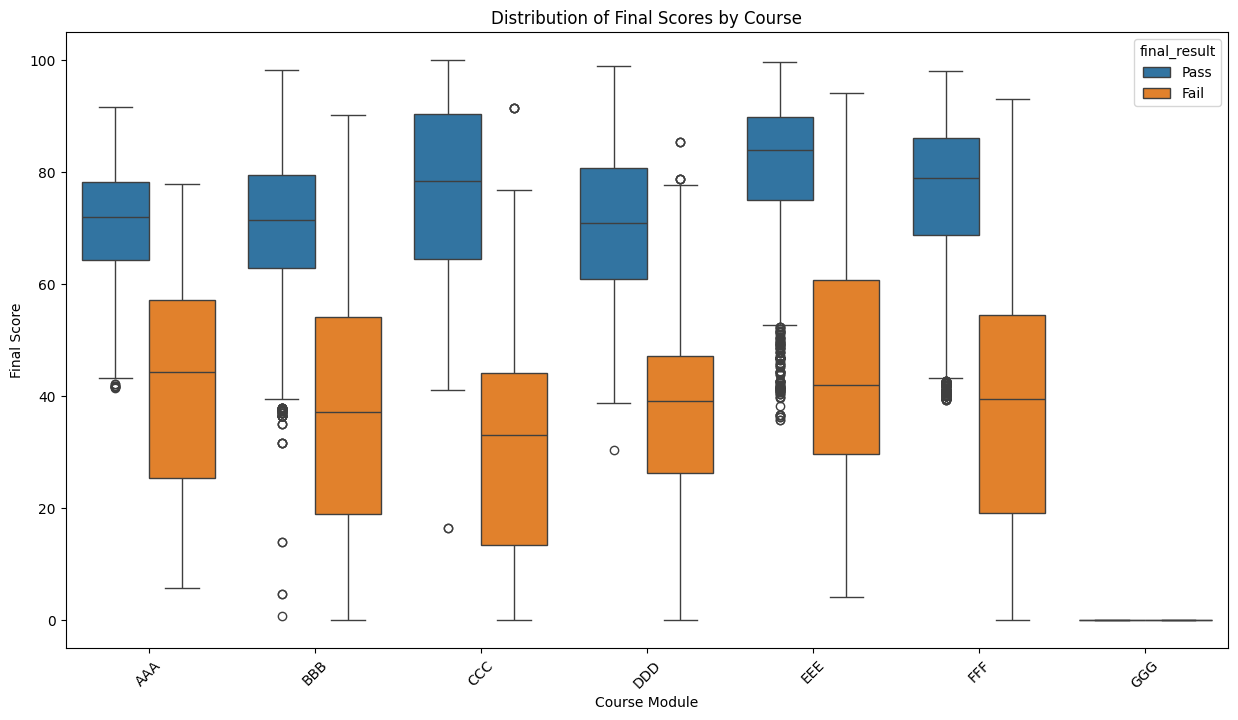

In [40]:
# Plot final score distributions per course
plt.figure(figsize=(15, 8))
sns.boxplot(data=final_df_cat, x='code_module', y='final_score', hue='final_result')
plt.title('Distribution of Final Scores by Course')
plt.xlabel('Course Module')
plt.ylabel('Final Score')
plt.xticks(rotation=45)
plt.show()

In [41]:
result_counts = final_df_cat.groupby(['code_module', 'code_presentation', 'final_result']).size().unstack(fill_value=0)
print("\nFinal result counts per course:")
print(result_counts)


Final result counts per course:
final_result                   Fail  Pass
code_module code_presentation            
AAA         2013J               100   785
            2014J                91   674
BBB         2013B              1282  3869
            2013J              1552  5125
            2014B              1476  4726
            2014J               782  3396
CCC         2014B               771  2236
            2014J              1068  3483
DDD         2013B              1750  3963
            2013J               871  2448
            2014B               546  1825
            2014J              1131  3084
EEE         2013J               238  1198
            2014B               234   995
            2014J               255  1344
FFF         2013B               876  2157
            2013J               968  3072
            2014B               704  1867
            2014J               826  3122
GGG         2013J               182   568
            2014B               245   906
 

##### Corrlation

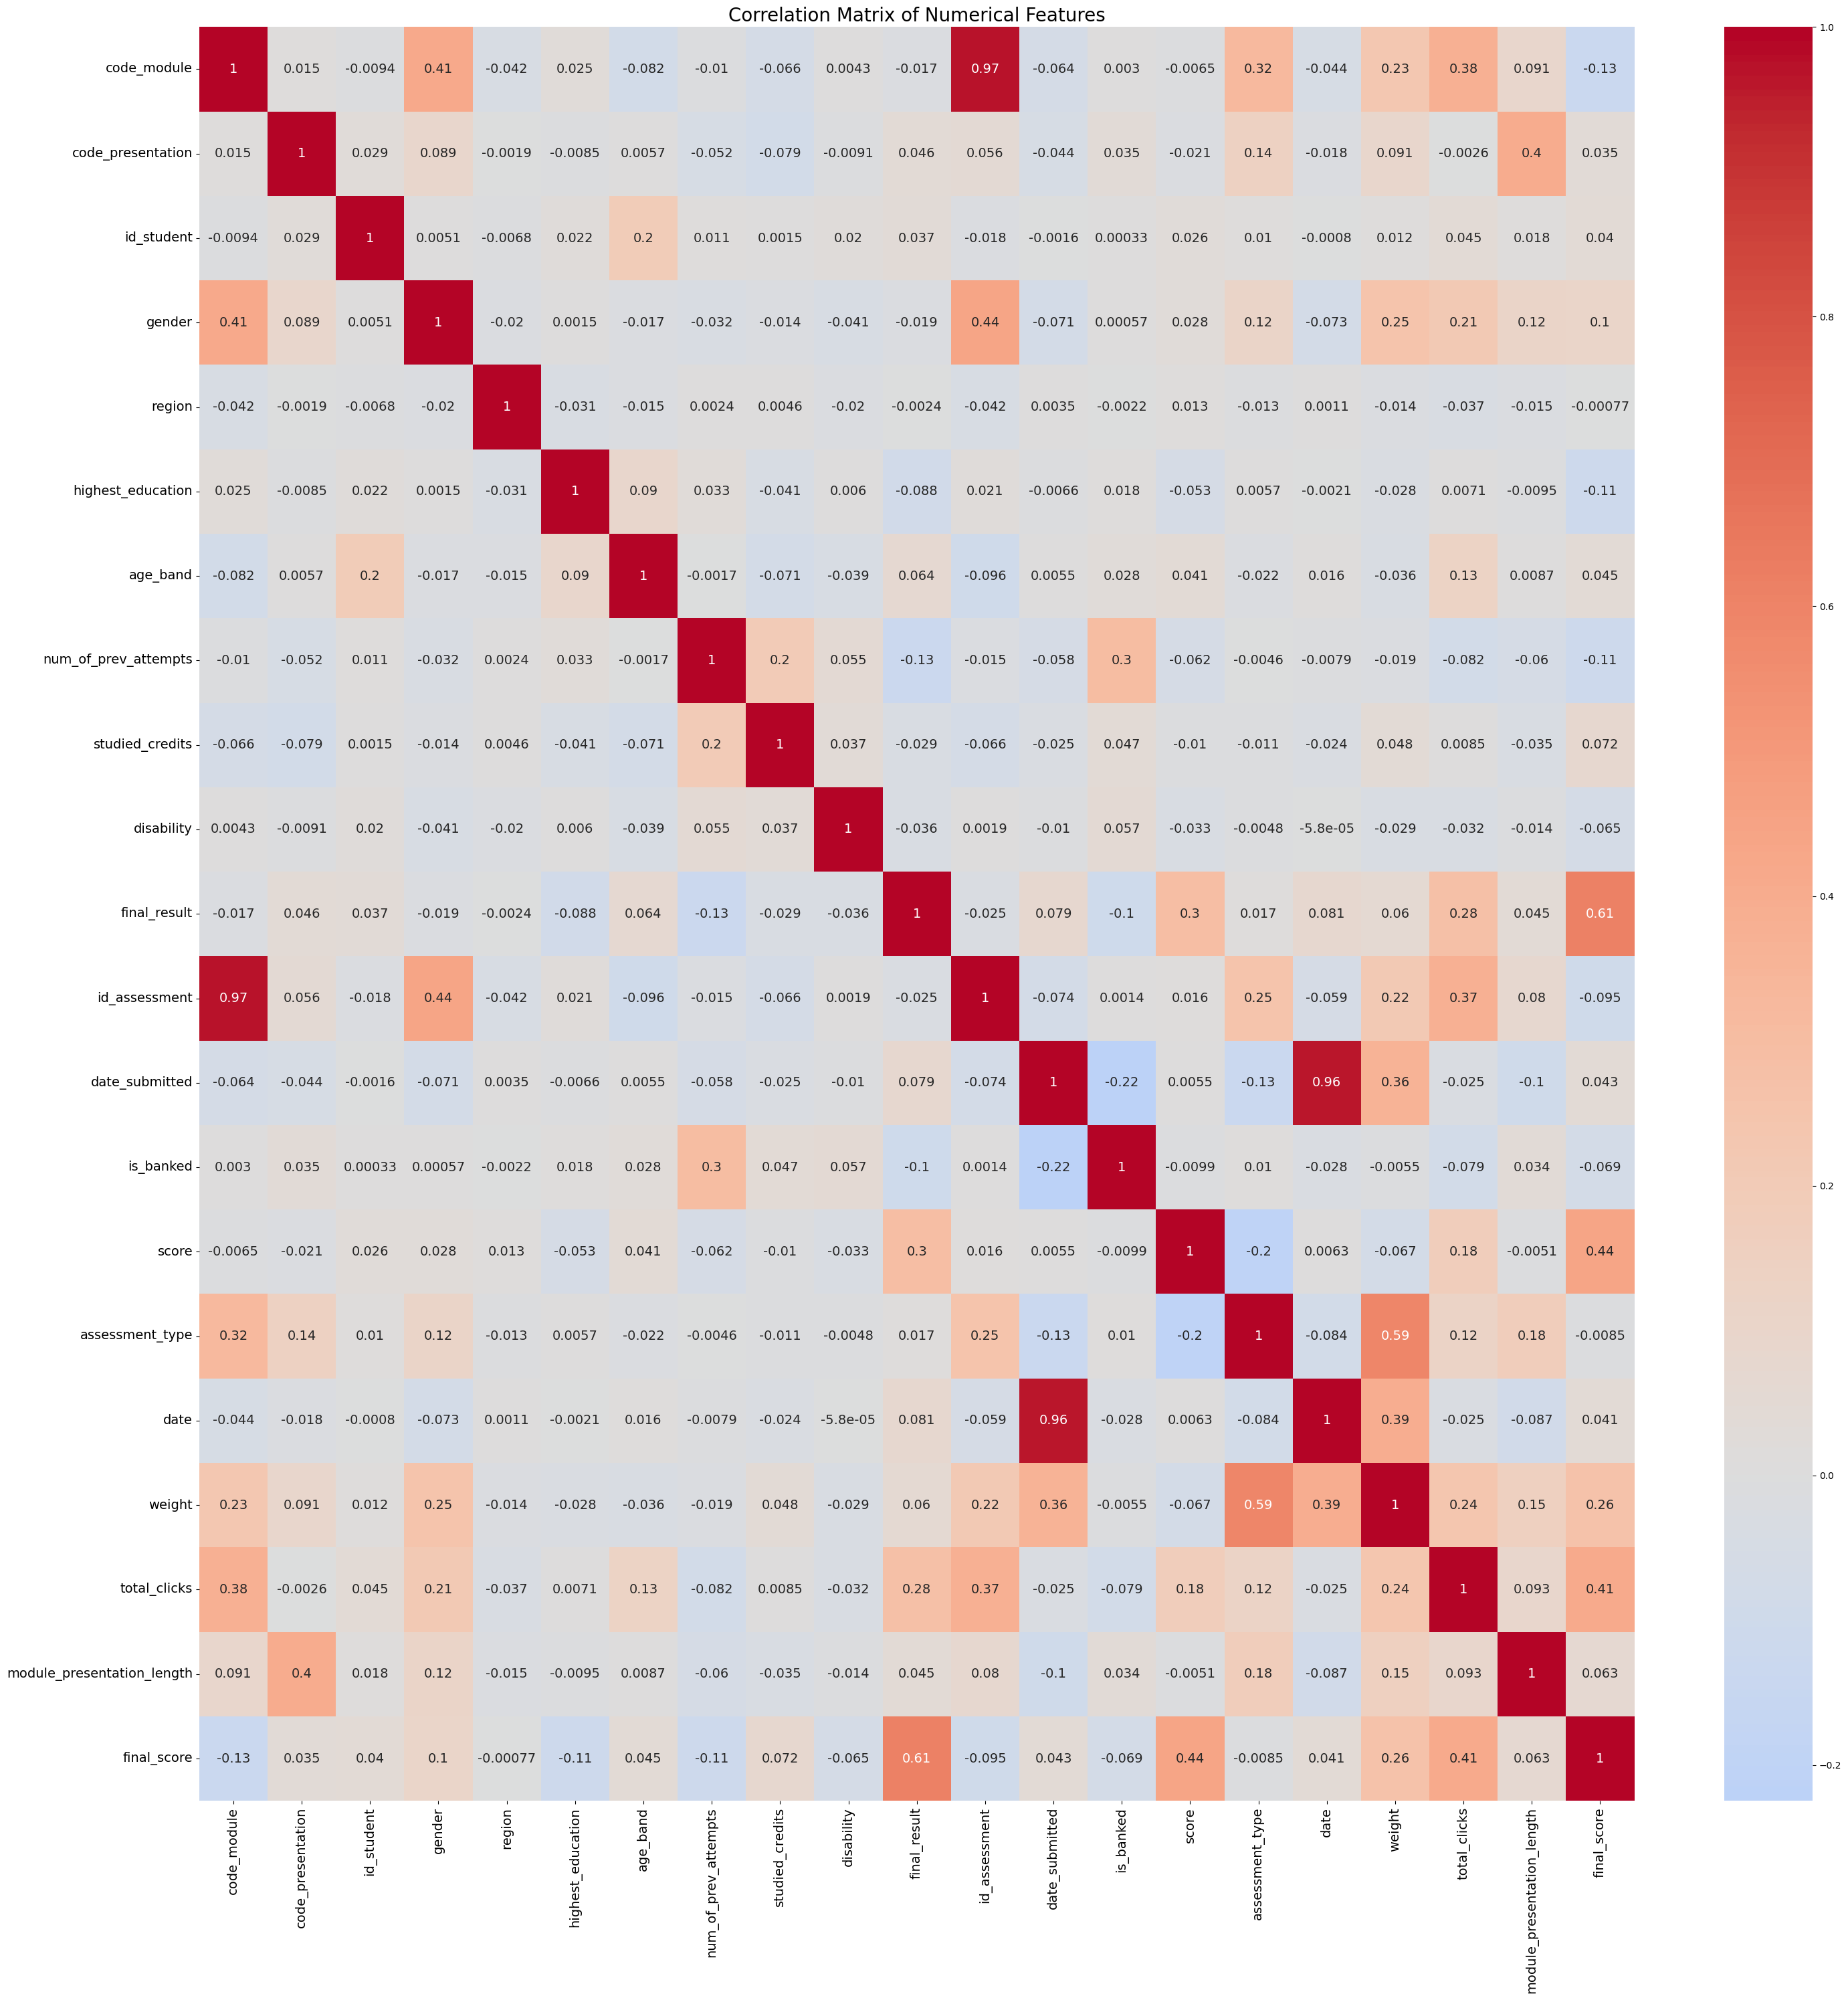

In [42]:
# First encode categorical variables
categorical_columns = ['code_module', 'code_presentation', 'gender', 'region', 
                      'highest_education', 'age_band', 'disability', 
                      'final_result', 'assessment_type']

# Create a copy to avoid modifying the original dataframe
final_df_encoded = final_df_cat.copy()

# Apply label encoding to all categorical columns
le = LabelEncoder()
for col in categorical_columns:
    if col in final_df_encoded.columns:
        final_df_encoded[col] = le.fit_transform(final_df_encoded[col].astype(str))

# Calculate correlation matrix on the encoded dataframe
correlation_matrix = final_df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, annot_kws={'size': 14})
plt.title('Correlation Matrix of Numerical Features', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

# Visualization

In [43]:
final_df_cat.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'id_assessment',
       'date_submitted', 'is_banked', 'score', 'assessment_type', 'date',
       'weight', 'total_clicks', 'module_presentation_length', 'final_score'],
      dtype='object')

Data Visualization Summary

1. ✅ Line Plots — Done.
2. ✅ Area Plots — Done.
3. ✅ Histogram — Done.
4. ✅ Bar Charts — Done.
5. ✅ Pie Charts — Done.
6. ✅ Box Plots — Done.
7. ✅ Scatter Plots — Done.
8. ✅ Bubble Plots — Done.

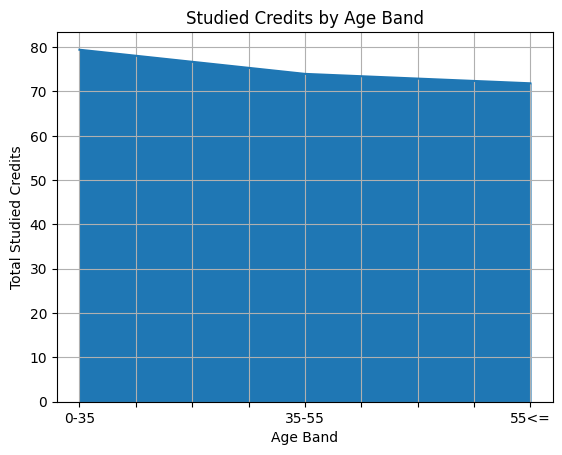

In [44]:
plt.figure()
df_age = final_df.groupby('age_band')['studied_credits'].mean()
df_age.plot(kind='area')
plt.title('Studied Credits by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Total Studied Credits')
plt.grid(True)
plt.show()

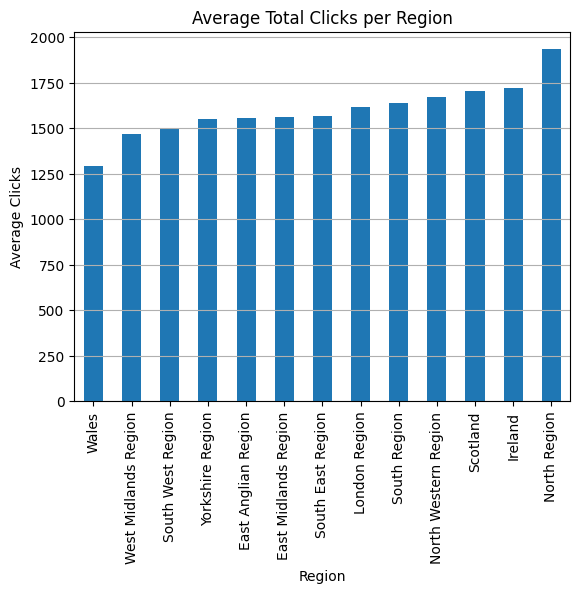

In [45]:
plt.figure()
df_region = final_df.groupby('region')['total_clicks'].mean().sort_values()
df_region.plot(kind='bar')
plt.title('Average Total Clicks per Region')
plt.xlabel('Region')
plt.ylabel('Average Clicks')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

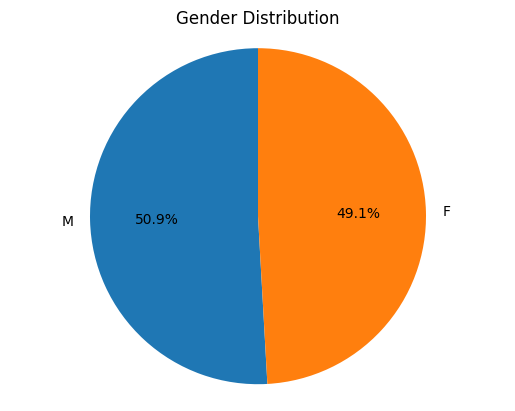

In [46]:
plt.figure()
gender_counts = final_df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')  
plt.show()

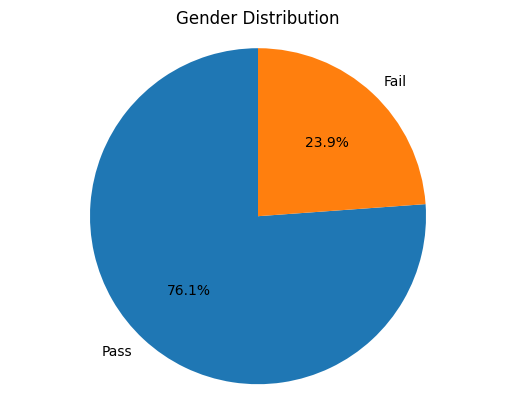

In [47]:
plt.figure()
gender_counts = final_df['final_result'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')  
plt.show()

In [48]:
final_df.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'id_assessment',
       'date_submitted', 'is_banked', 'score', 'assessment_type', 'date',
       'weight', 'total_clicks', 'module_presentation_length', 'final_score'],
      dtype='object')

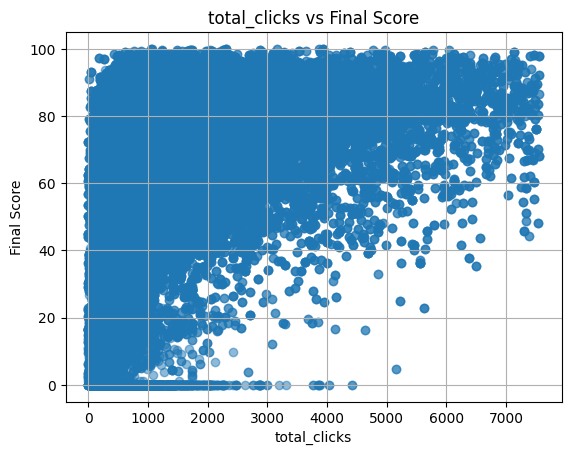

In [49]:
plt.figure()
plt.scatter(final_df['total_clicks'], final_df['final_score'], alpha=0.5)
plt.title('total_clicks vs Final Score')
plt.xlabel('total_clicks')
plt.ylabel('Final Score')
plt.grid(True)
plt.show()

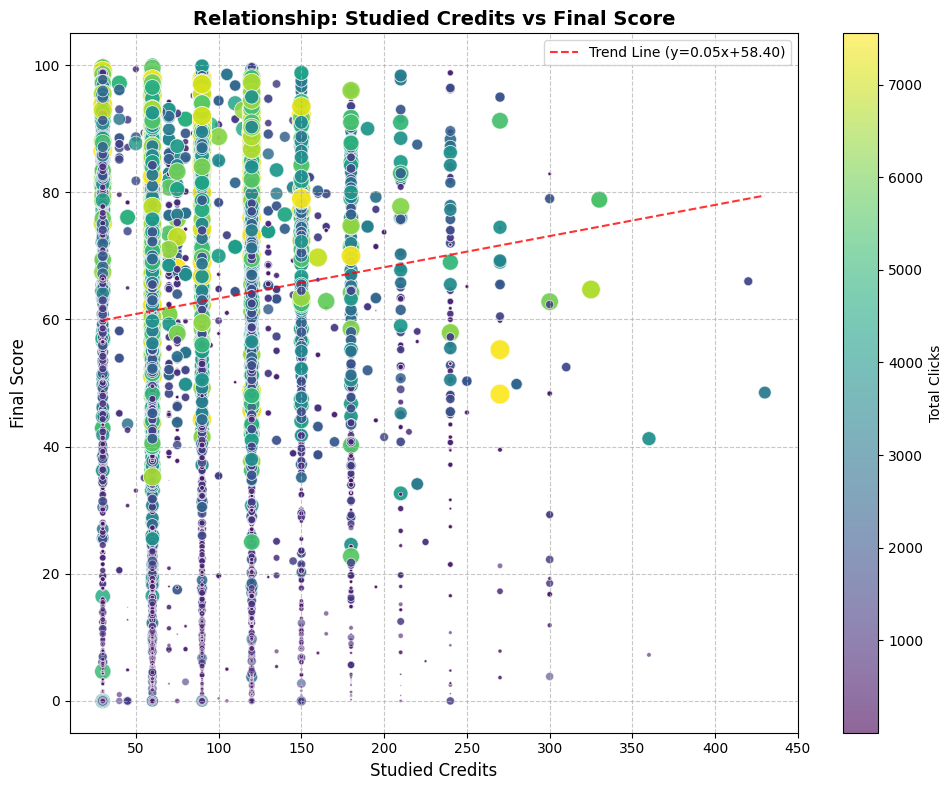

In [50]:

plt.figure(figsize=(10, 8))
# Normalize bubble size for better visualization
bubble_size = (final_df['total_clicks'] / final_df['total_clicks'].max()) * 200
# Create a colormap based on total_clicks for additional dimension
scatter = plt.scatter(
    final_df['studied_credits'], 
    final_df['final_score'], 
    s=bubble_size, 
    alpha=0.6,
    c=final_df['total_clicks'],
    cmap='viridis',
    edgecolor='w',
    linewidth=0.5
)

plt.title('Relationship: Studied Credits vs Final Score', fontsize=14, fontweight='bold')
plt.xlabel('Studied Credits', fontsize=12)
plt.ylabel('Final Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.colorbar(scatter, label='Total Clicks')

# Add a best fit line to show trend
z = np.polyfit(final_df['studied_credits'], final_df['final_score'], 1)
p = np.poly1d(z)
plt.plot(sorted(final_df['studied_credits'].unique()), 
         p(sorted(final_df['studied_credits'].unique())), 
         "r--", alpha=0.8, label=f"Trend Line (y={z[0]:.2f}x+{z[1]:.2f})")
plt.legend()

plt.tight_layout()
plt.show()


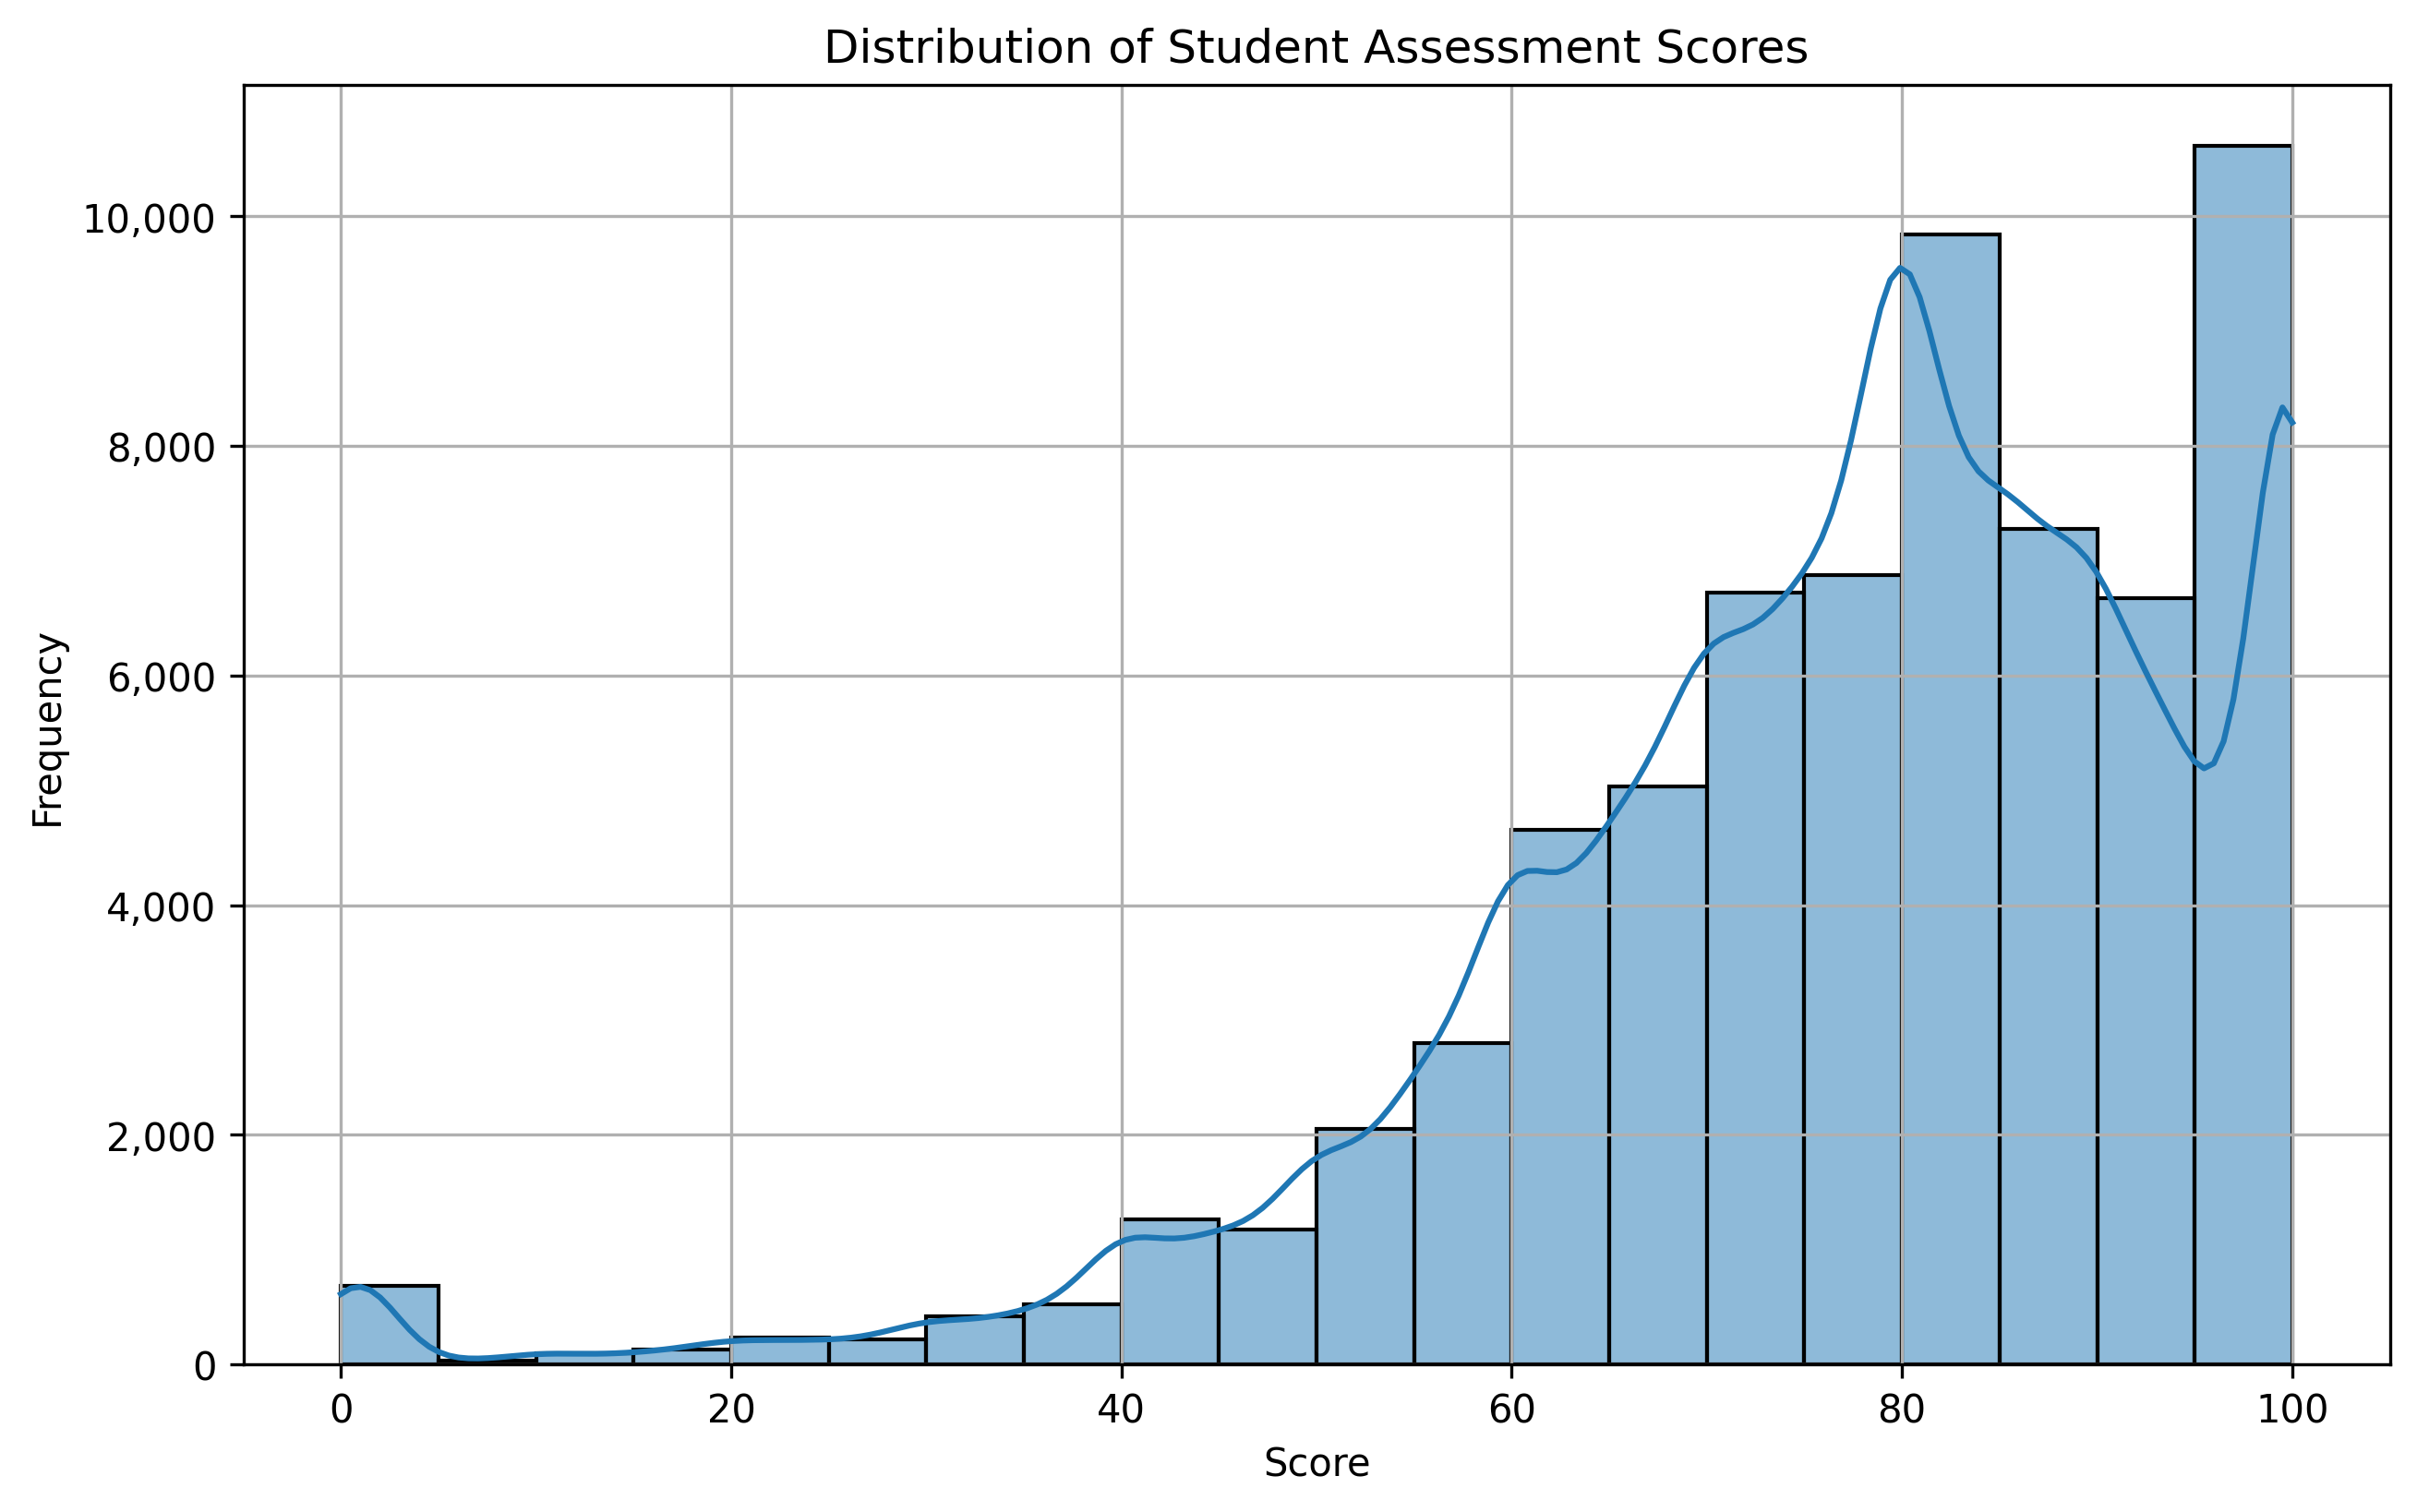

In [51]:
plt.figure(figsize=(10, 6), dpi=300)
sns.histplot(final_df_cat['score'], bins=20, kde=True)

plt.title('Distribution of Student Assessment Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Formatting the y-axis with commas for thousands
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))

plt.grid(True)
plt.show()

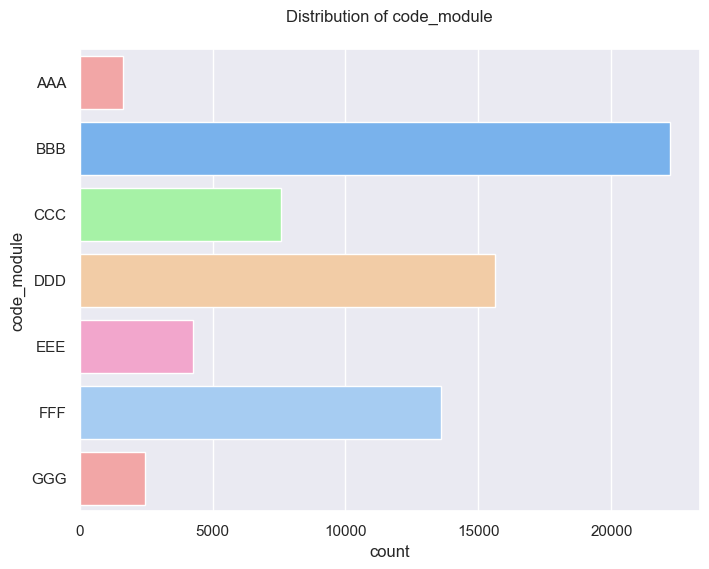

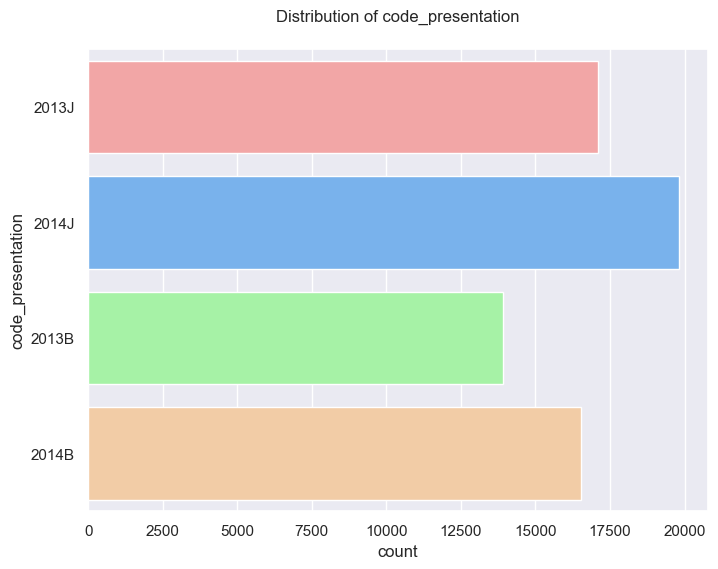

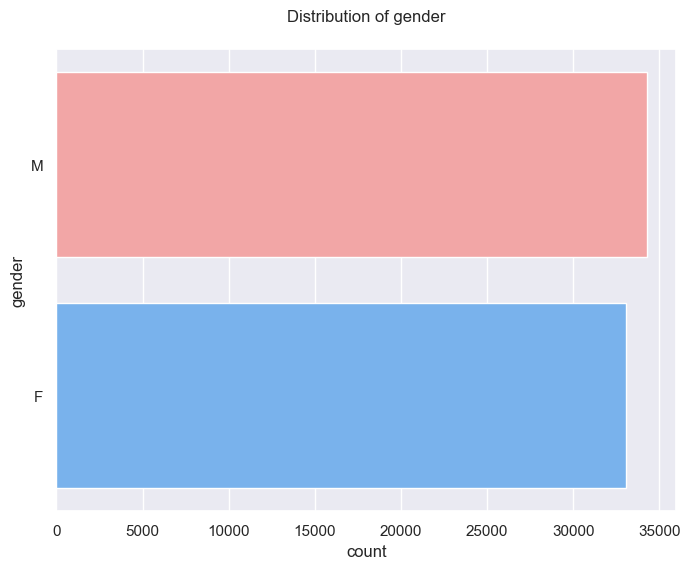

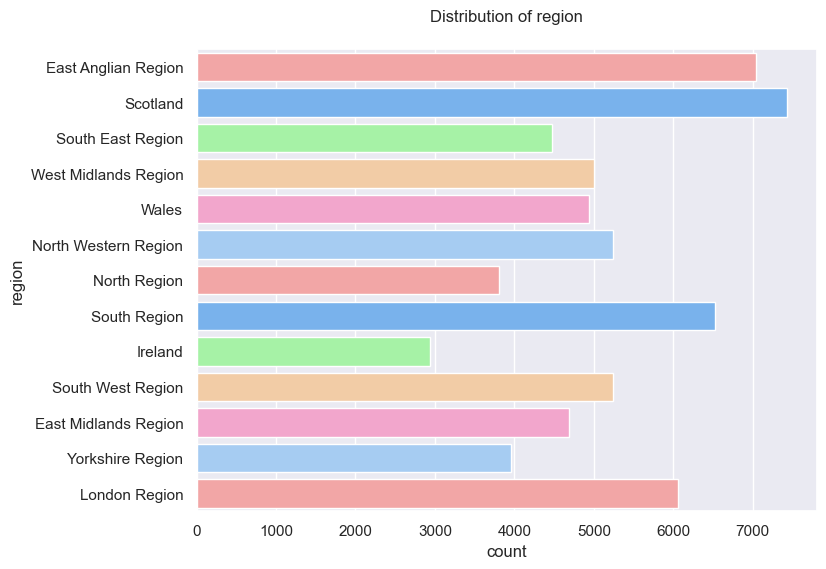

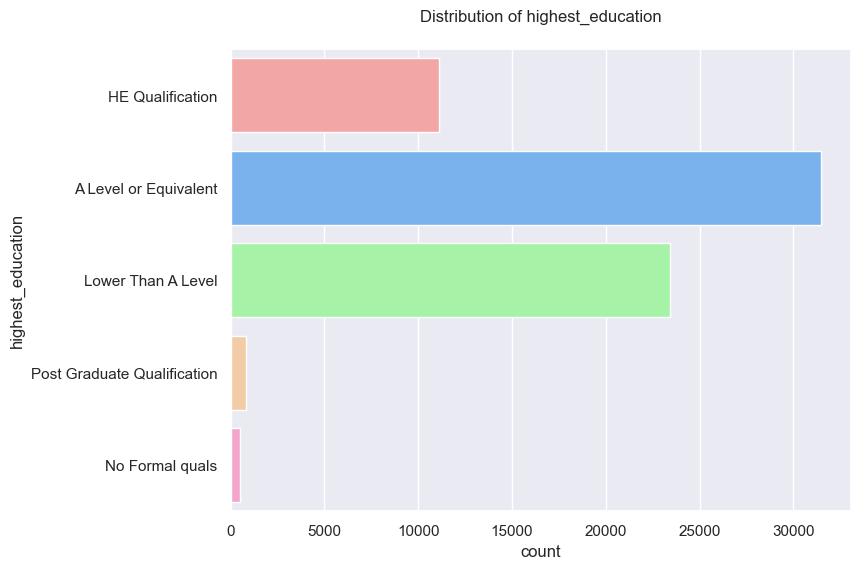

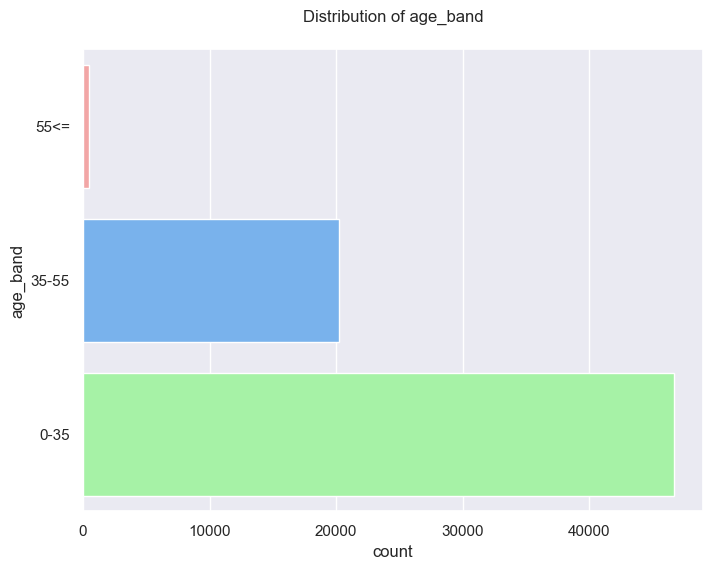

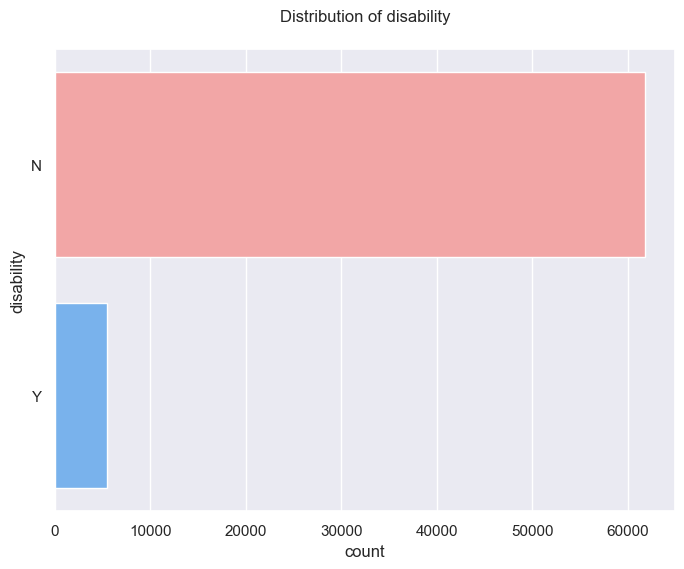

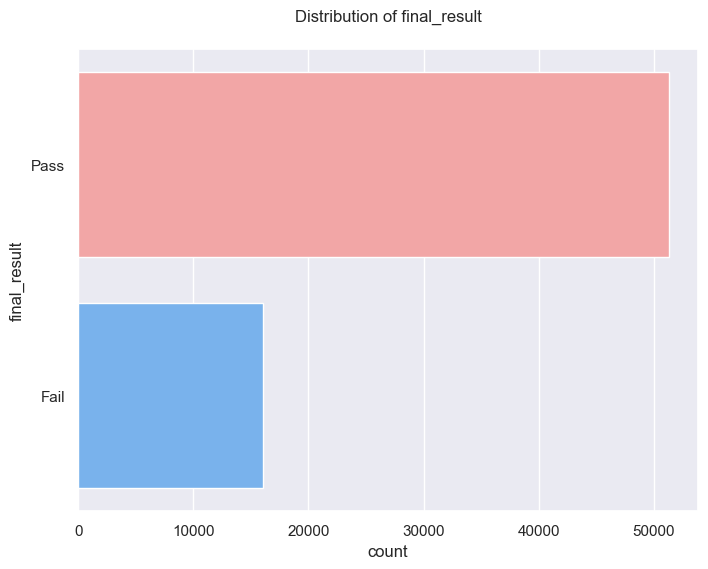

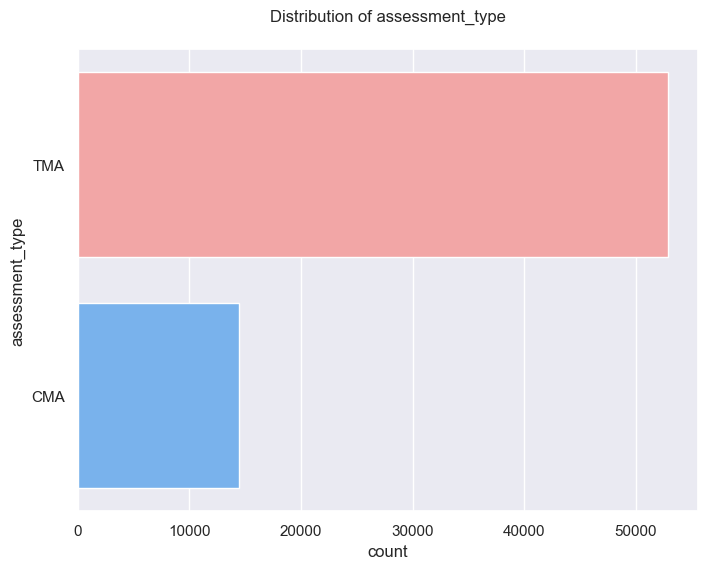

In [52]:
sns.set_theme(style="darkgrid")
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#99CCFF']
object_columns = final_df_cat.select_dtypes(include=['object']).columns
for column in object_columns:
    try:
        plt.figure(figsize=(8,6))
        sns.countplot(y=column, data=final_df_cat, palette=colors)
        plt.title(f'Distribution of {column}', pad=20)
        plt.show()
    except Exception as e:
        print(f"Skipping plot for {column} due to error: {str(e)}")
        continue

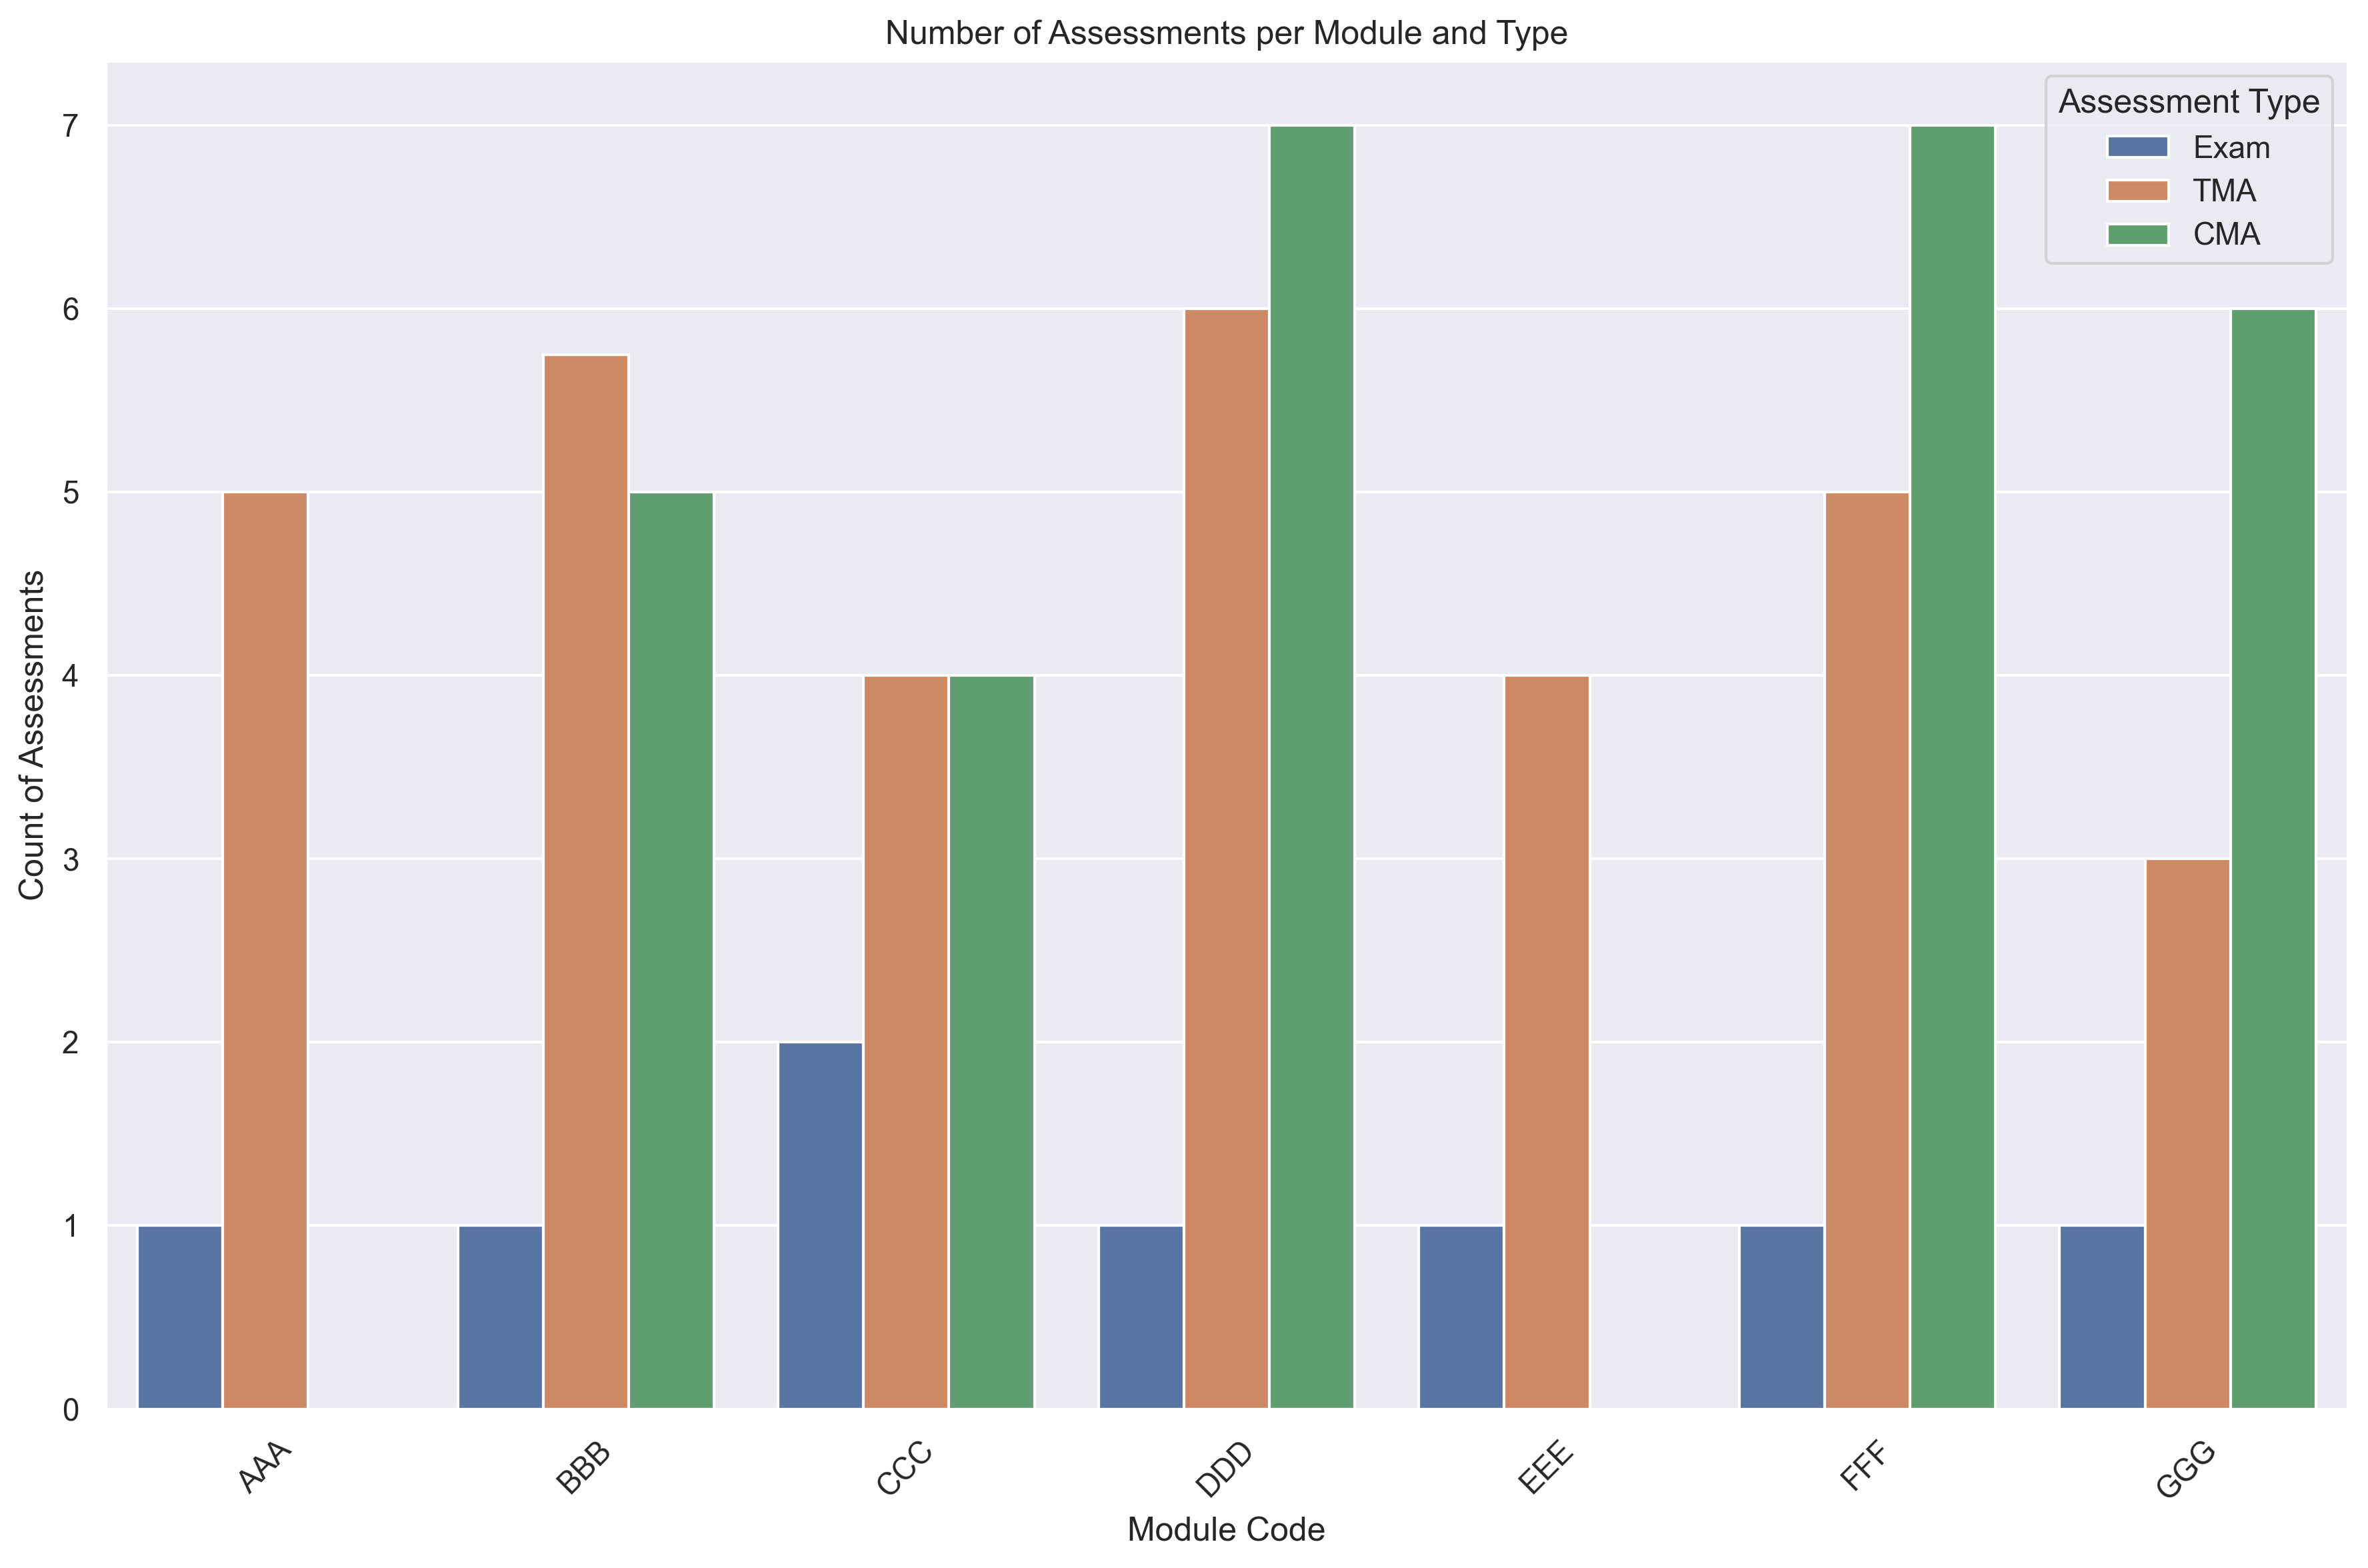

In [53]:
df = assessments_df
df = df.drop(['date','weight'], axis=1).groupby(['code_module','assessment_type','code_presentation']).count()

df_reset = df.reset_index()
plt.figure(figsize=(12, 8), dpi=300)
sns.barplot(data=df_reset, x='code_module', y=df_reset.columns[-1], hue='assessment_type', ci=None)
plt.title('Number of Assessments per Module and Type')
plt.xlabel('Module Code')
plt.ylabel('Count of Assessments')
plt.xticks(rotation=45)
plt.legend(title='Assessment Type')
plt.tight_layout()

# Show the plot
plt.show()

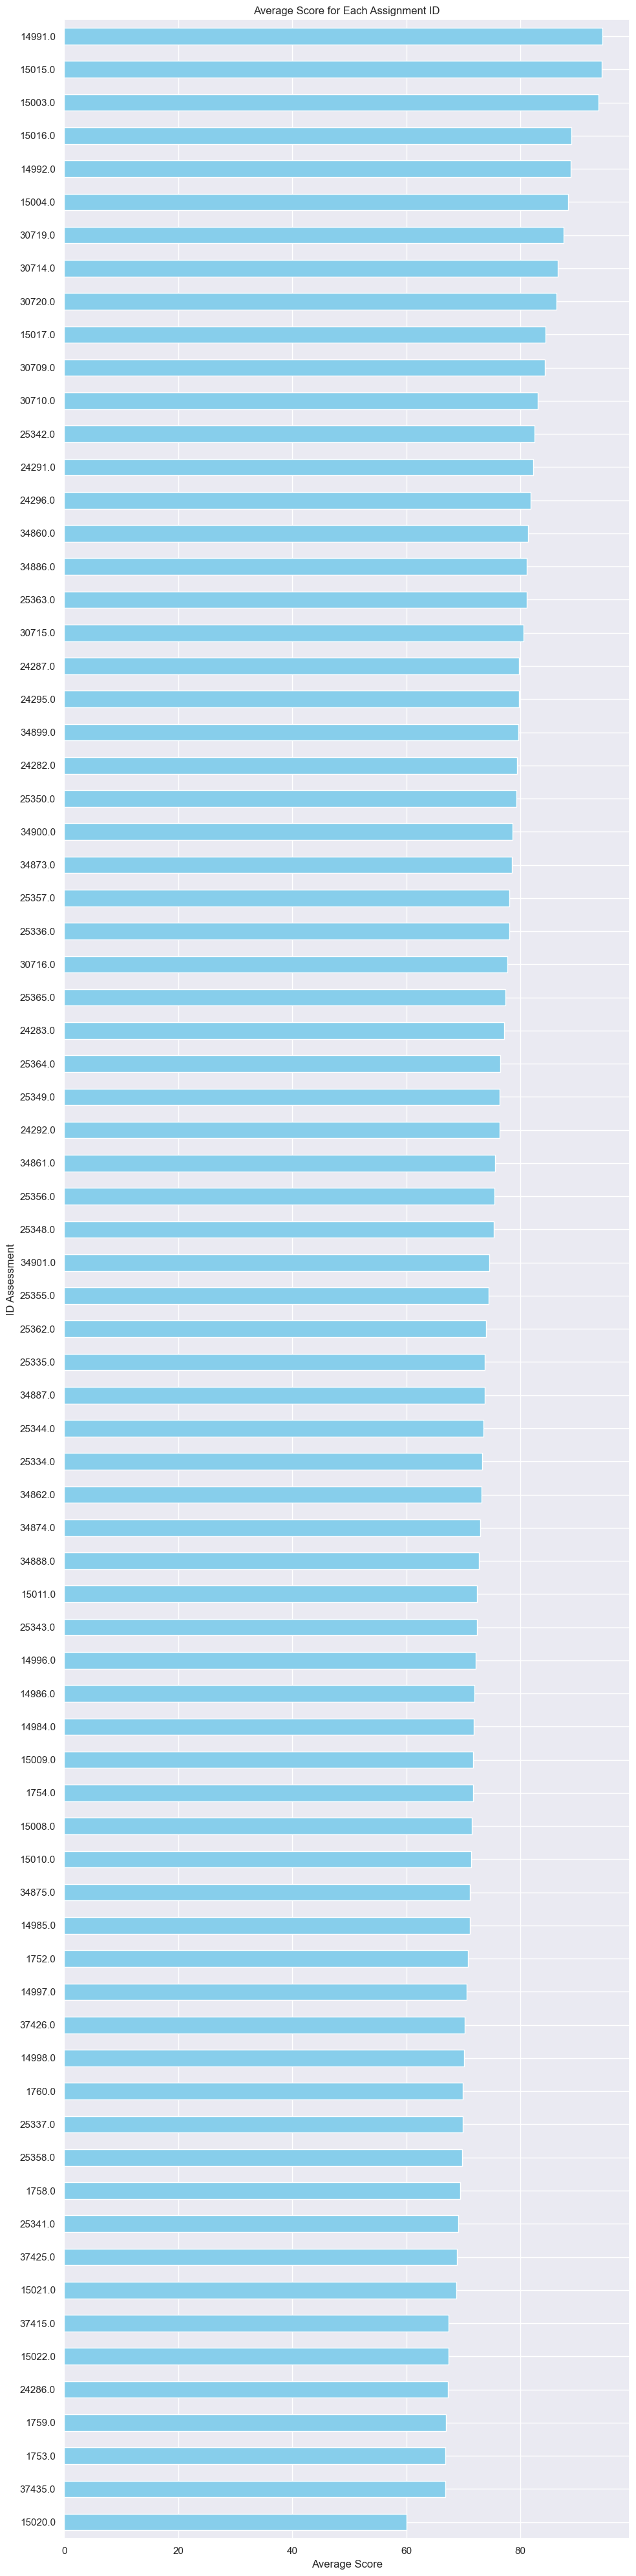

In [54]:
average_scores = final_df_cat.groupby('id_assessment')['score'].mean()
average_scores_sorted = average_scores.sort_values()

# Plotting the average scores
plt.figure(figsize=(10, 40)) 
average_scores_sorted.plot(kind='barh', color='skyblue')
plt.xlabel('Average Score')
plt.ylabel('ID Assessment')
plt.title('Average Score for Each Assignment ID')
plt.tight_layout() 
plt.show()

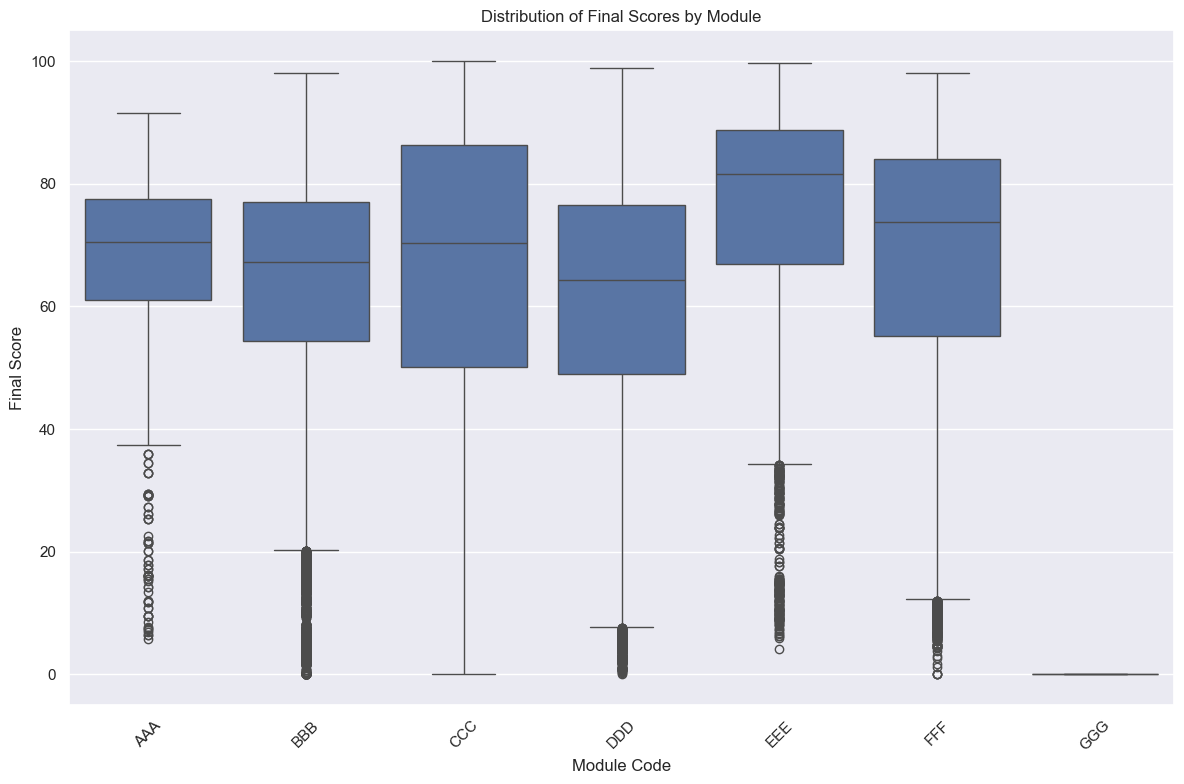

In [55]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=final_df_cat, x='code_module', y='final_score')
plt.title('Distribution of Final Scores by Module')
plt.xlabel('Module Code')
plt.ylabel('Final Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

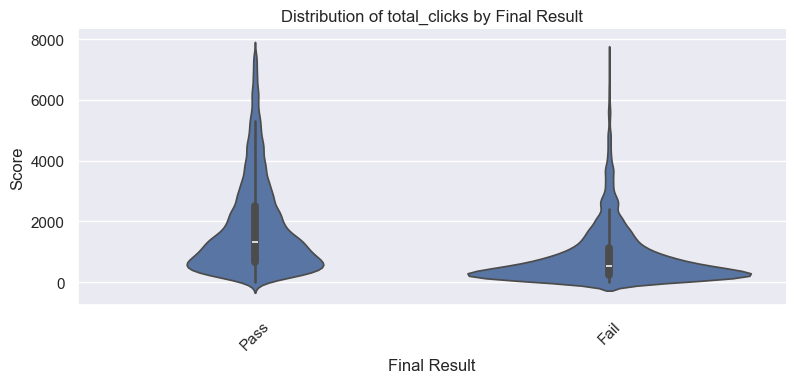

In [56]:
sns.catplot(x='final_result', y='total_clicks', kind='violin', data=final_df_cat, height=4, aspect=2)
plt.title('Distribution of total_clicks by Final Result')
plt.xlabel('Final Result')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

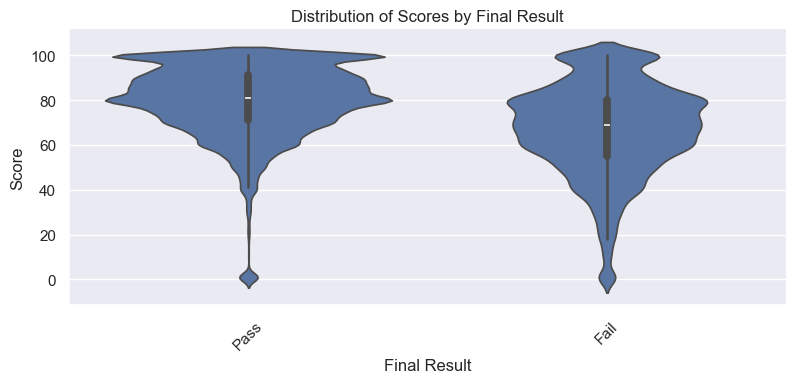

In [57]:
sns.catplot(x='final_result', y='score', kind='violin', data=final_df_cat, height=4, aspect=2)
plt.title('Distribution of Scores by Final Result')
plt.xlabel('Final Result')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

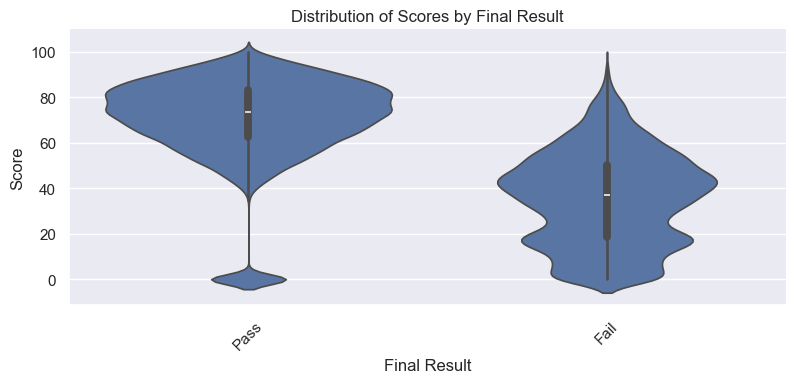

In [58]:
sns.catplot(x='final_result', y='final_score', kind='violin', data=final_df_cat, height=4, aspect=2)
plt.title('Distribution of Scores by Final Result')
plt.xlabel('Final Result')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

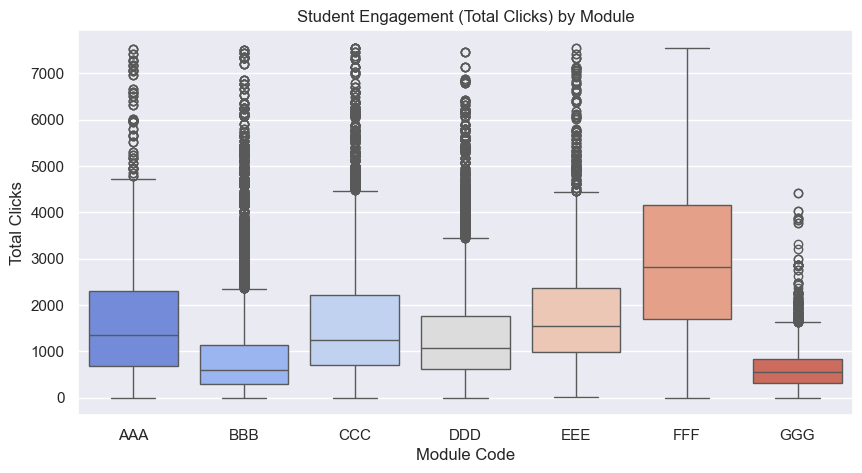

In [59]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='code_module', y='total_clicks', data=final_df_cat, palette='coolwarm')
plt.title('Student Engagement (Total Clicks) by Module')
plt.xlabel('Module Code')
plt.ylabel('Total Clicks')
plt.show()

# Feature Engineering

In [60]:
final_df_cat.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'id_assessment',
       'date_submitted', 'is_banked', 'score', 'assessment_type', 'date',
       'weight', 'total_clicks', 'module_presentation_length', 'final_score'],
      dtype='object')

In [61]:
# Create aggregated features by student
student_aggs = final_df_cat.groupby('id_student').agg({
    'total_clicks': ['mean', 'sum', 'std', 'min', 'max'],
    'score': ['mean', 'std', 'min', 'max'],
    'weight': ['mean', 'sum'],
    'date_submitted': ['mean', 'min', 'max'],
    'date': ['mean', 'min', 'max']
}).reset_index()

# Flatten the column names
student_aggs.columns = ['id_student'] + ['_'.join(col).strip() for col in student_aggs.columns[1:]]
#___________________________________________________________________________________________________
# Create interaction features
final_df_cat['clicks_per_weight'] = final_df_cat['total_clicks'] / (final_df_cat['weight'] + 1) 
final_df_cat['submission_timeliness'] = final_df_cat['date_submitted'] - final_df_cat['date']
final_df_cat['score_per_weight'] = final_df_cat['score'] / (final_df_cat['weight'] + 1)
#___________________________________________________________________________________________________
# Create categorical interaction features
final_df_cat['module_presentation'] = final_df_cat['code_module'] + '_' + final_df_cat['code_presentation']
final_df_cat['education_age'] = final_df_cat['highest_education'] + '_' + final_df_cat['age_band']
#___________________________________________________________________________________________________
# Merge aggregated features back to the main dataframe
final_df_cat = final_df_cat.merge(student_aggs, on='id_student', how='left')
#___________________________________________________________________________________________________
# Feature selection - remove highly correlated features
# Calculate correlation matrix
corr_matrix = final_df_cat.select_dtypes(include=['int64', 'float64']).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(f"Dropping highly correlated features: {to_drop}")
final_df_cat = final_df_cat.drop(columns=to_drop, errors='ignore')
#___________________________________________________________________________________________________
# Create polynomial features for important numerical variables
final_df_cat['total_clicks_squared'] = final_df_cat['total_clicks'] ** 2
final_df_cat['score_squared'] = final_df_cat['score'] ** 2
#___________________________________________________________________________________________________
#Create binary features
final_df_cat['has_disability'] = (final_df_cat['disability'] == 'Y').astype(int)
final_df_cat['is_first_attempt'] = (final_df_cat['num_of_prev_attempts'] == 0).astype(int)
final_df_cat['submitted_late'] = (final_df_cat['submission_timeliness'] < 0).astype(int)
#___________________________________________________________________________________________________
#Normalize some features
final_df_cat['normalized_clicks'] = final_df_cat['total_clicks'] / final_df_cat['module_presentation_length']
final_df_cat['normalized_submission_time'] = final_df_cat['date_submitted'] / final_df_cat['module_presentation_length']

# Display the new features
print(f"Original shape: {final_df_cat.shape}")
print("New features added:")
for col in final_df_cat.columns:
    if col not in final_df_cat.columns[:21]:  # First 21 columns are original
        print(f"- {col}")


Dropping highly correlated features: ['date', 'total_clicks_mean', 'total_clicks_min', 'total_clicks_max']
Original shape: (67338, 46)
New features added:
- submission_timeliness
- score_per_weight
- module_presentation
- education_age
- total_clicks_sum
- total_clicks_std
- score_mean
- score_std
- score_min
- score_max
- weight_mean
- weight_sum
- date_submitted_mean
- date_submitted_min
- date_submitted_max
- date_mean
- date_min
- date_max
- total_clicks_squared
- score_squared
- has_disability
- is_first_attempt
- submitted_late
- normalized_clicks
- normalized_submission_time


# Models


In [62]:
final_df_cat.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'id_assessment',
       'date_submitted', 'is_banked', 'score', 'assessment_type', 'weight',
       'total_clicks', 'module_presentation_length', 'final_score',
       'clicks_per_weight', 'submission_timeliness', 'score_per_weight',
       'module_presentation', 'education_age', 'total_clicks_sum',
       'total_clicks_std', 'score_mean', 'score_std', 'score_min', 'score_max',
       'weight_mean', 'weight_sum', 'date_submitted_mean',
       'date_submitted_min', 'date_submitted_max', 'date_mean', 'date_min',
       'date_max', 'total_clicks_squared', 'score_squared', 'has_disability',
       'is_first_attempt', 'submitted_late', 'normalized_clicks',
       'normalized_submission_time'],
      dtype='object')


Random Forest Results:
MSE: 21.8293
RMSE: 4.6722
MAE: 2.2827
R2 Score: 0.9626


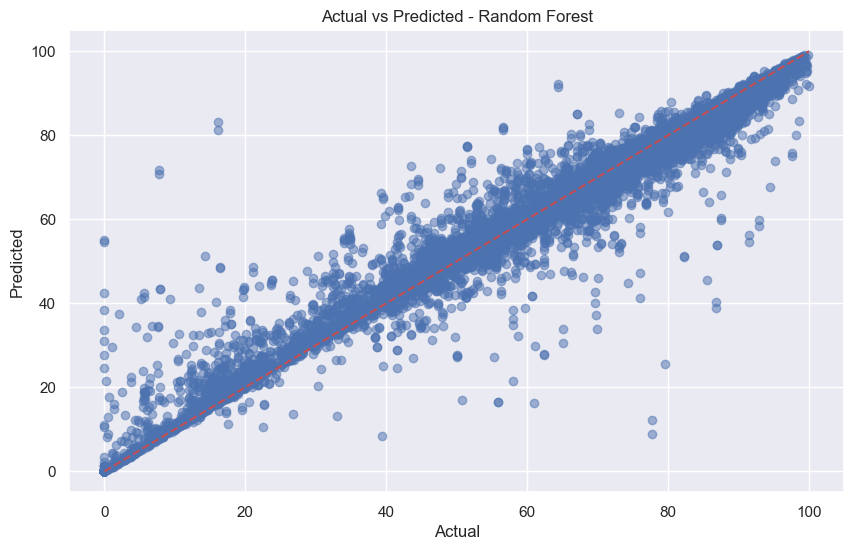


Linear Regression Results:
MSE: 149.7181
RMSE: 12.2359
MAE: 9.3623
R2 Score: 0.7436


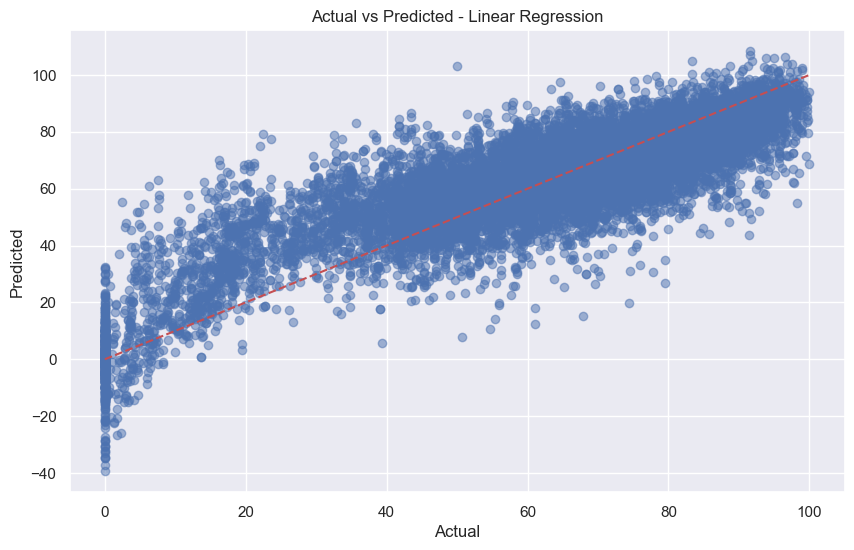


Ridge Regression Results:
MSE: 149.7127
RMSE: 12.2357
MAE: 9.3623
R2 Score: 0.7436


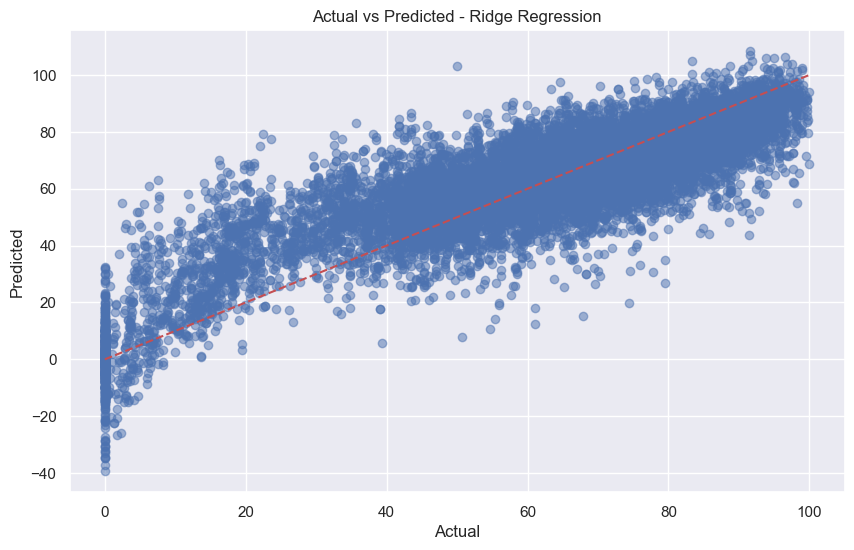


Lasso Regression Results:
MSE: 197.7798
RMSE: 14.0634
MAE: 10.9188
R2 Score: 0.6612


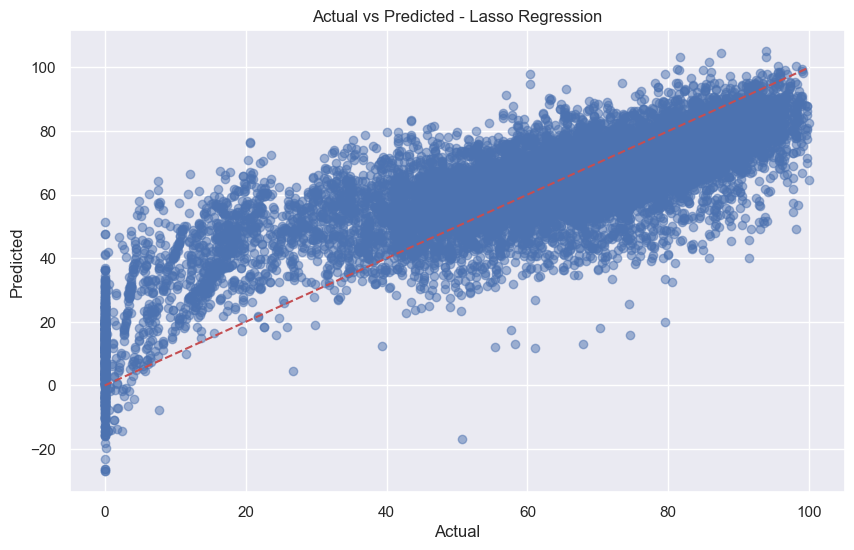


KNN Results:
MSE: 121.3051
RMSE: 11.0139
MAE: 7.7275
R2 Score: 0.7922


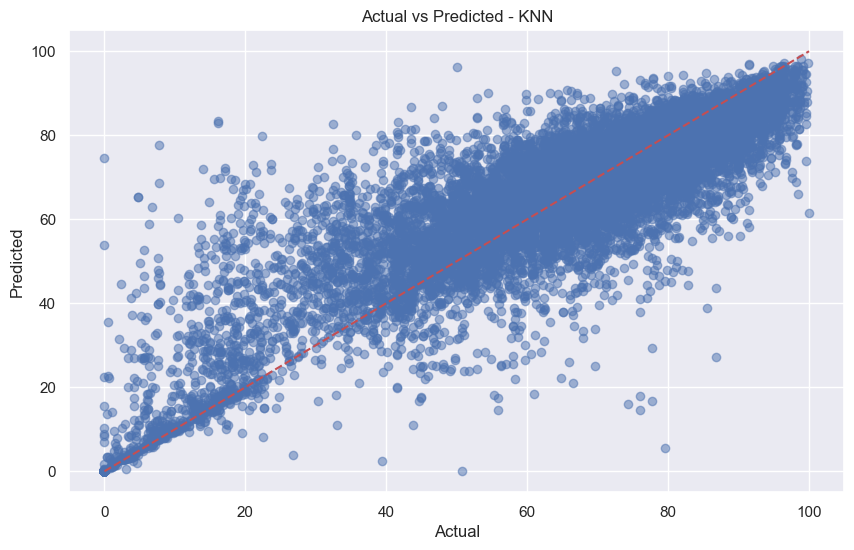


Decision Tree Results:
MSE: 22.8473
RMSE: 4.7799
MAE: 0.8629
R2 Score: 0.9609


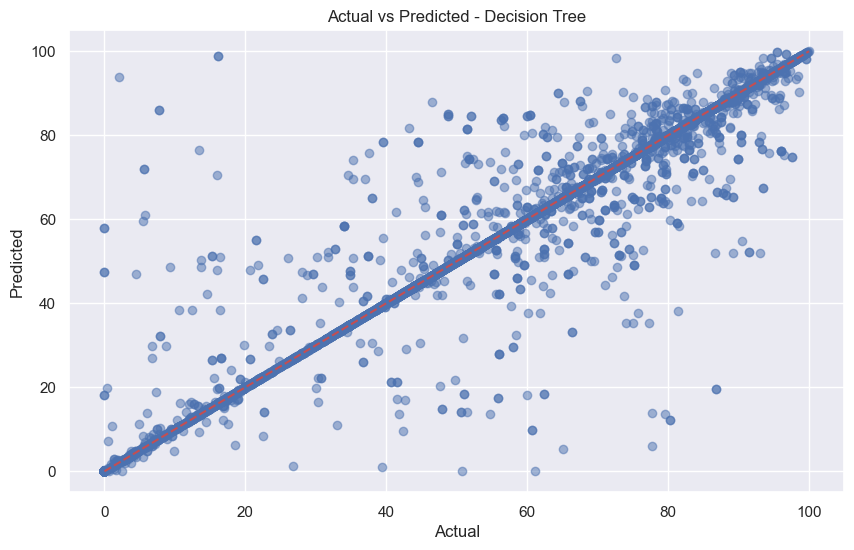


Gradient Boosting Results:
MSE: 114.8084
RMSE: 10.7149
MAE: 7.9033
R2 Score: 0.8033


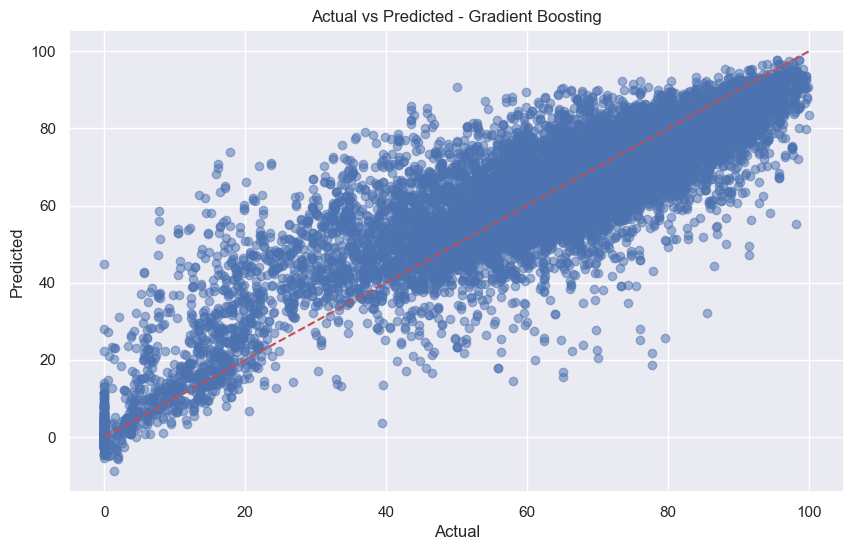

In [63]:
# Prepare data for regression using final_df_cat
X = final_df_cat.drop(['final_score',"final_result"], axis=1)
y = final_df_cat['final_score']  # Using final_score as the target for regression

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Handle missing values
imputer = SimpleImputer(strategy='mean')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define regression models to evaluate
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Initialize results dictionary
results = {
    'Model': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2 Score': []
}

# Train and evaluate each model
for name, model in models.items():
    # Create pipeline with preprocessing
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('imputer', imputer),
        ('regressor', model)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results['Model'].append(name)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['MAE'].append(mae)
    results['R2 Score'].append(r2)
    
    # Print individual model results
    print(f"\n{name} Results:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2 Score: {r2:.4f}")
    
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted - {name}')
    plt.show()



Model Performance Comparison:


Model         MSE       RMSE        MAE  R2 Score
0      Random Forest   21.829325   4.672186   2.282707  0.962609
5      Decision Tree   22.847340   4.779889   0.862863  0.960865
6  Gradient Boosting  114.808406  10.714868   7.903342  0.803348
4                KNN  121.305143  11.013861   7.727470  0.792220
2   Ridge Regression  149.712748  12.235716   9.362302  0.743561
1  Linear Regression  149.718069  12.235934   9.362252  0.743552
3   Lasso Regression  197.779761  14.063419  10.918843  0.661228

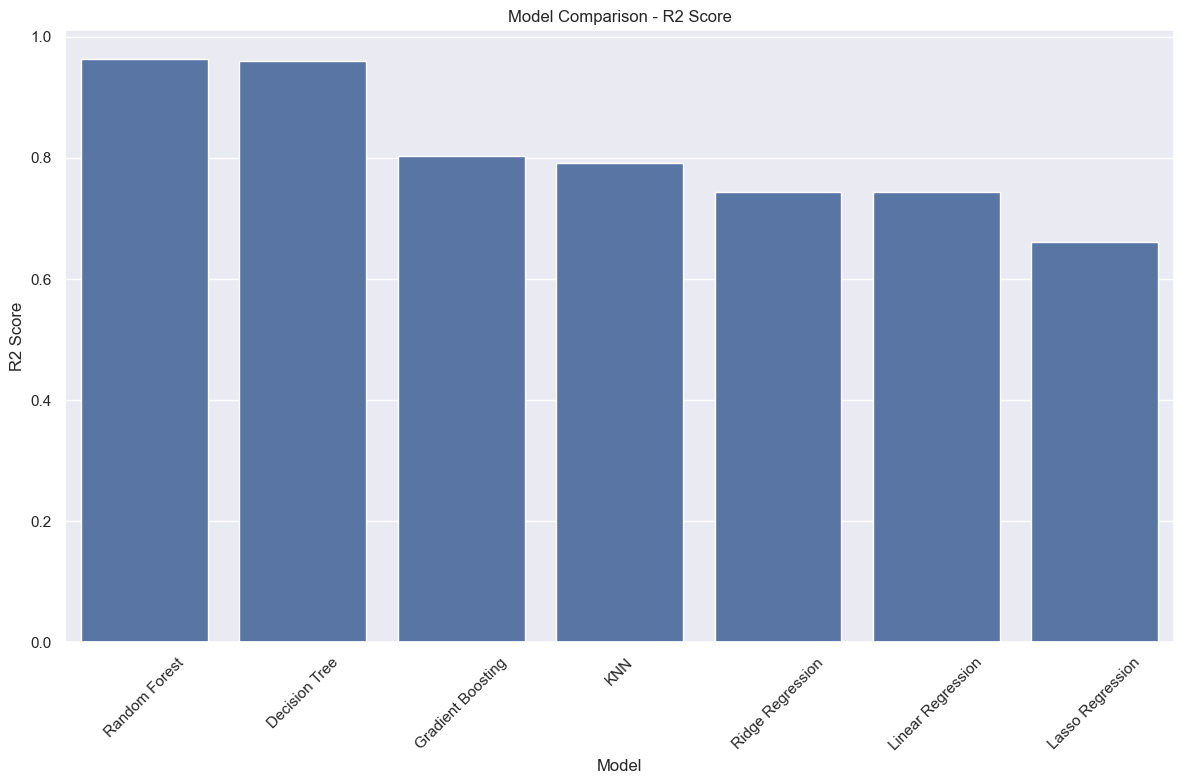


Feature Importance Analysis for Random Forest:


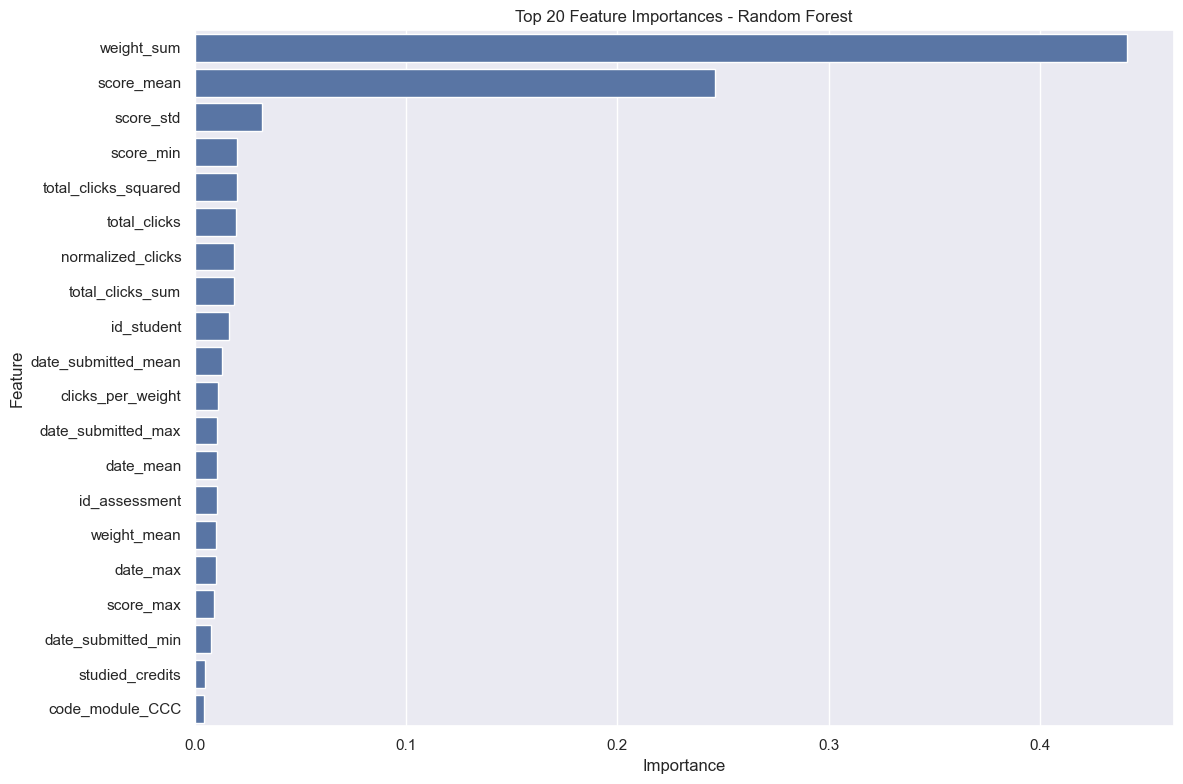

In [64]:
# Create a DataFrame with the results
results_df = pd.DataFrame(results)

# Sort by R2 Score in descending order
results_df = results_df.sort_values('R2 Score', ascending=False)

# Display the results table
print("\nModel Performance Comparison:")
display(results_df)

# Create a bar plot to compare model performance
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='R2 Score', data=results_df)
plt.title('Model Comparison - R2 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Feature importance analysis for the best model (assuming Random Forest or Gradient Boosting)
best_model_name = results_df.iloc[0]['Model']
print(f"\nFeature Importance Analysis for {best_model_name}:")

# Get the best model from the pipeline
for name, model in models.items():
    if name == best_model_name:
        # Recreate and fit the pipeline to access the model
        best_pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('imputer', imputer),
            ('regressor', model)
        ])
        best_pipeline.fit(X_train, y_train)
        best_model = best_pipeline.named_steps['regressor']
        
        # Check if the model has feature_importances_ attribute
        if hasattr(best_model, 'feature_importances_'):
            # Get feature names after preprocessing
            feature_names = []
            
            # For numerical features (they pass through directly)
            for col in numerical_cols:
                feature_names.append(col)
            
            # For categorical features (they get one-hot encoded)
            for col in categorical_cols:
                unique_values = final_df_cat[col].unique()
                for val in unique_values:
                    feature_names.append(f"{col}_{val}")
            
            # Limit to the actual number of features used
            feature_names = feature_names[:len(best_model.feature_importances_)]
            
            # Create a DataFrame for feature importances
            importances = pd.DataFrame({
                'Feature': feature_names,
                'Importance': best_model.feature_importances_
            })
            
            # Sort by importance
            importances = importances.sort_values('Importance', ascending=False)
            
            # Display top 20 features
            top_features = importances.head(20)
            
            # Plot feature importances
            plt.figure(figsize=(12, 8))
            sns.barplot(x='Importance', y='Feature', data=top_features)
            plt.title(f'Top 20 Feature Importances - {best_model_name}')
            plt.tight_layout()
            plt.show()
        else:
            print(f"The {best_model_name} model doesn't provide feature importances.")
        break



Random Forest Results:
Accuracy: 0.9530
Precision: 0.9525
Recall/Sensitivity: 0.9878
Specificity: 0.8399
F1 Score: 0.9698
ROC AUC: 0.9880

Classification Report:
              precision    recall  f1-score   support

        Fail       0.95      0.84      0.89      3166
        Pass       0.95      0.99      0.97     10302

    accuracy                           0.95     13468
   macro avg       0.95      0.91      0.93     13468
weighted avg       0.95      0.95      0.95     13468



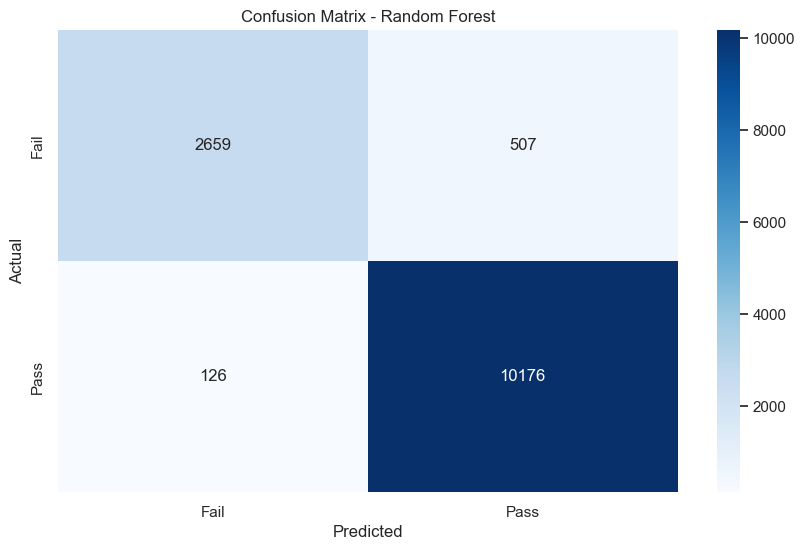

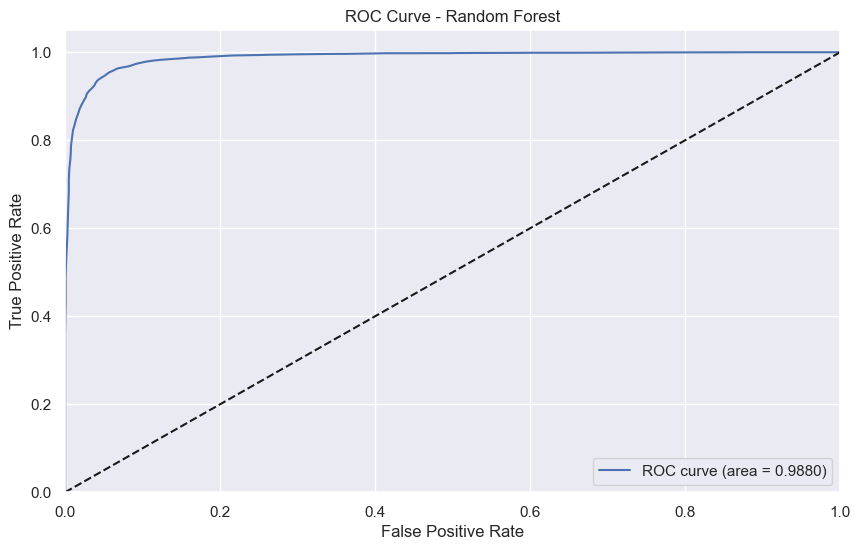


Logistic Regression Results:
Accuracy: 0.8355
Precision: 0.8565
Recall/Sensitivity: 0.9429
Specificity: 0.4858
F1 Score: 0.8976
ROC AUC: 0.8635

Classification Report:
              precision    recall  f1-score   support

        Fail       0.72      0.49      0.58      3166
        Pass       0.86      0.94      0.90     10302

    accuracy                           0.84     13468
   macro avg       0.79      0.71      0.74     13468
weighted avg       0.83      0.84      0.82     13468



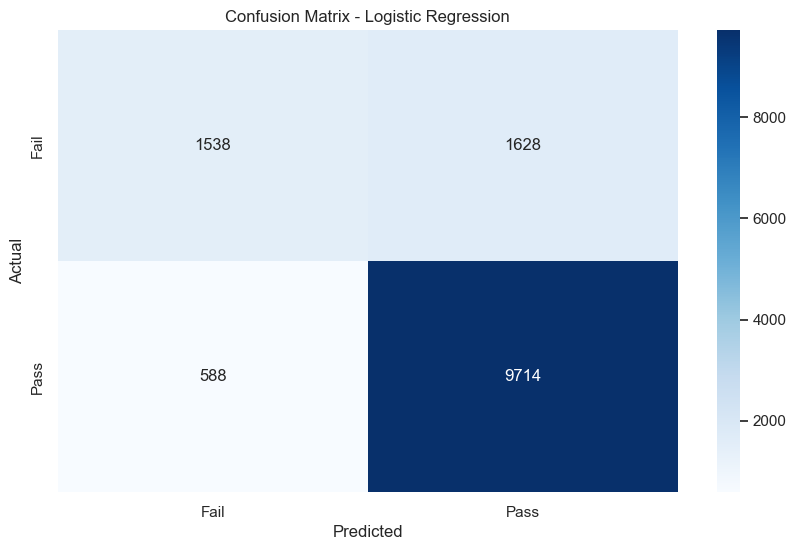

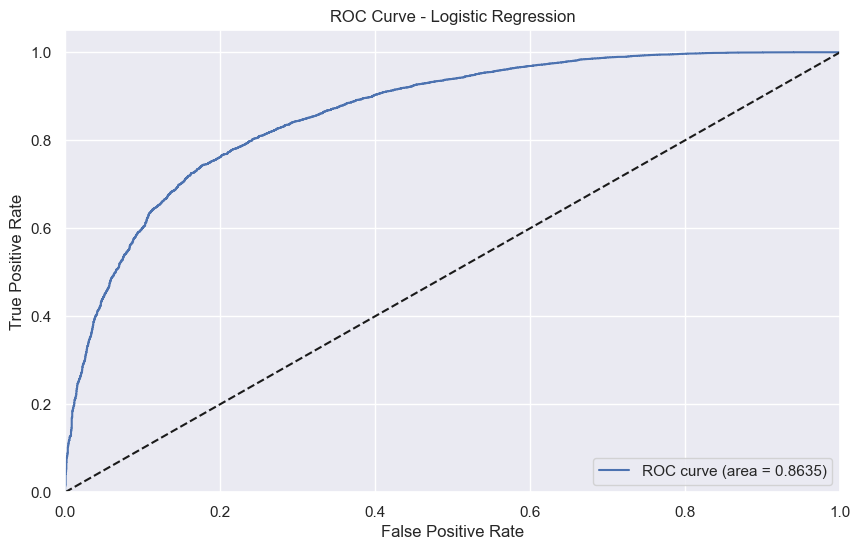


KNN Results:
Accuracy: 0.8596
Precision: 0.8755
Recall/Sensitivity: 0.9519
Specificity: 0.5594
F1 Score: 0.9121
ROC AUC: 0.8793

Classification Report:
              precision    recall  f1-score   support

        Fail       0.78      0.56      0.65      3166
        Pass       0.88      0.95      0.91     10302

    accuracy                           0.86     13468
   macro avg       0.83      0.76      0.78     13468
weighted avg       0.85      0.86      0.85     13468



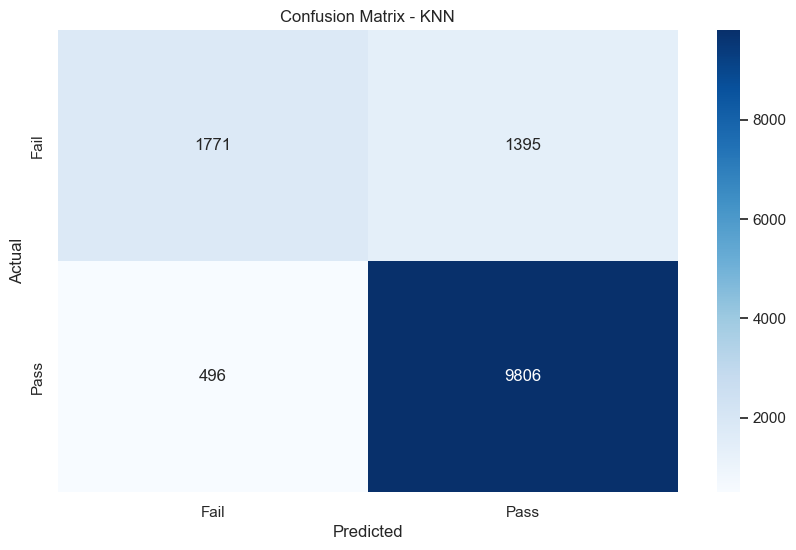

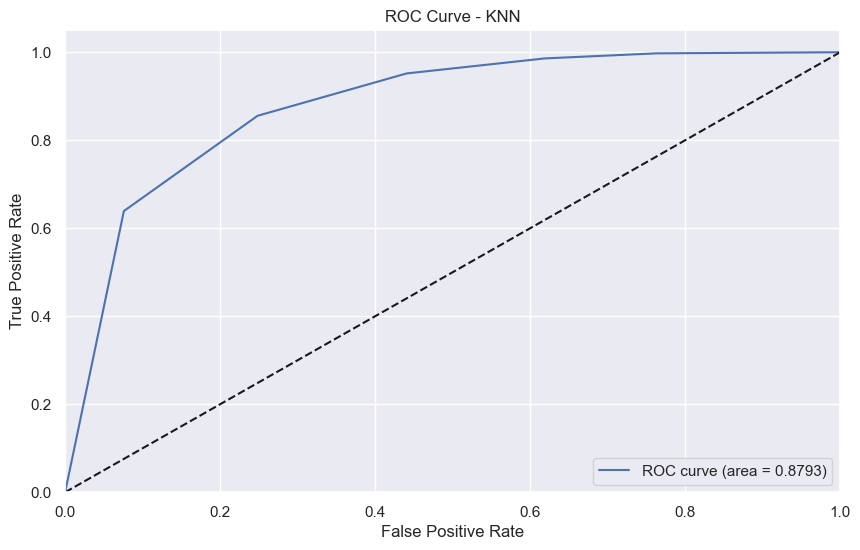


Decision Tree Results:
Accuracy: 0.9730
Precision: 0.9836
Recall/Sensitivity: 0.9812
Specificity: 0.9466
F1 Score: 0.9824
ROC AUC: 0.9639

Classification Report:
              precision    recall  f1-score   support

        Fail       0.94      0.95      0.94      3166
        Pass       0.98      0.98      0.98     10302

    accuracy                           0.97     13468
   macro avg       0.96      0.96      0.96     13468
weighted avg       0.97      0.97      0.97     13468



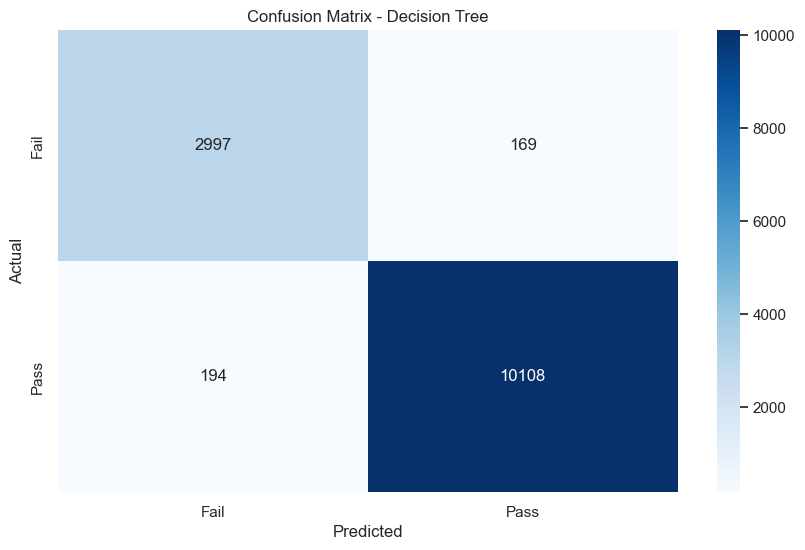

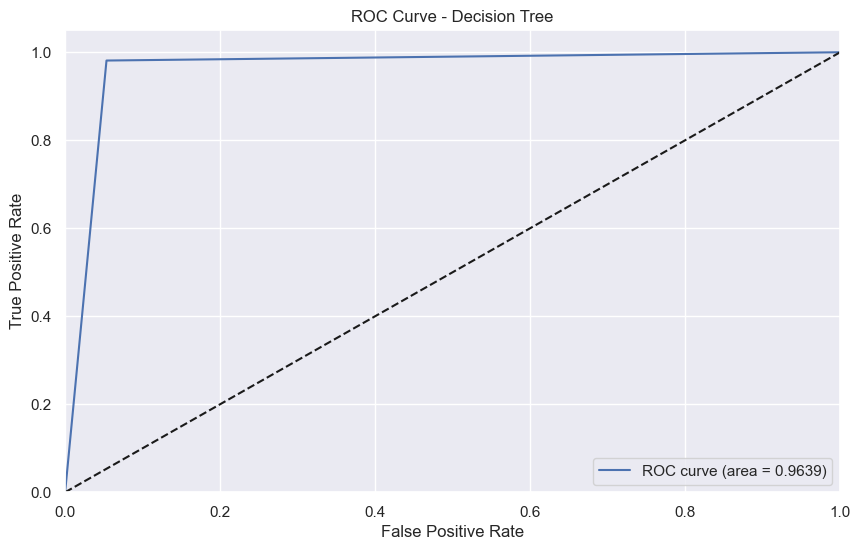


Gradient Boosting Results:
Accuracy: 0.8496
Precision: 0.8636
Recall/Sensitivity: 0.9541
Specificity: 0.5098
F1 Score: 0.9066
ROC AUC: 0.8786

Classification Report:
              precision    recall  f1-score   support

        Fail       0.77      0.51      0.61      3166
        Pass       0.86      0.95      0.91     10302

    accuracy                           0.85     13468
   macro avg       0.82      0.73      0.76     13468
weighted avg       0.84      0.85      0.84     13468



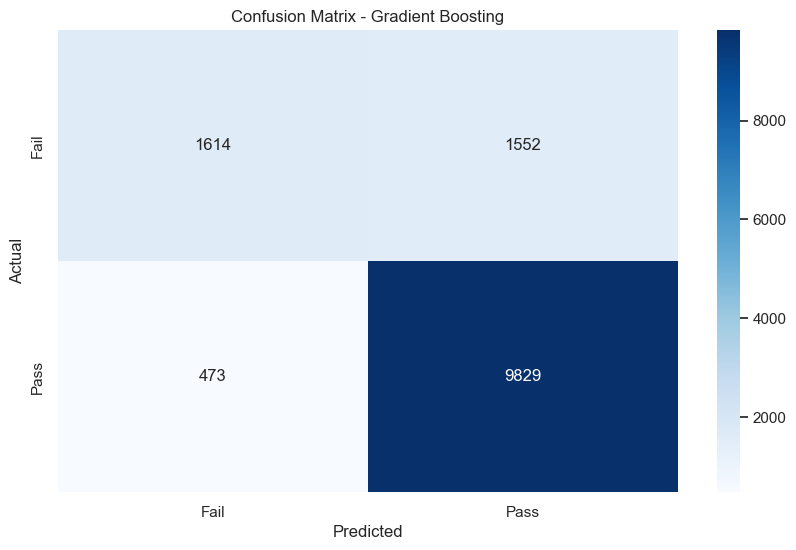

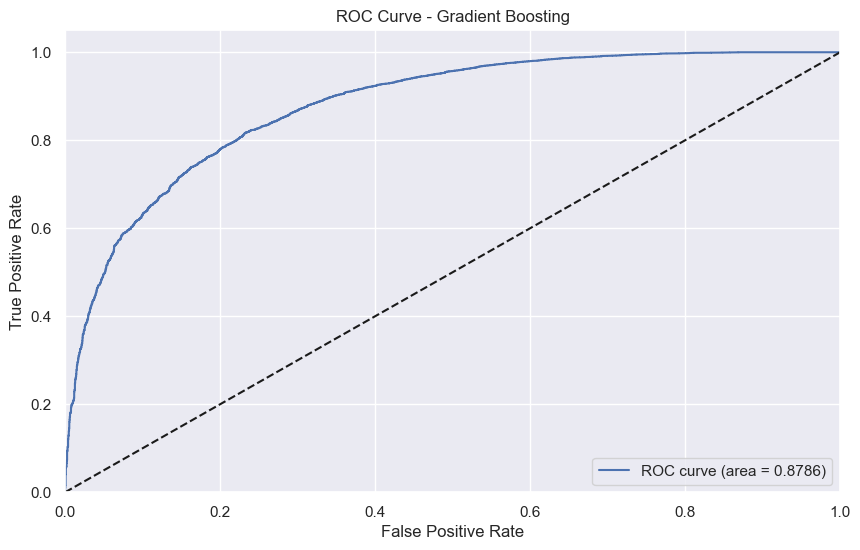


GaussianNB Results:
Accuracy: 0.5079
Precision: 0.9260
Recall/Sensitivity: 0.3877
Specificity: 0.8992
F1 Score: 0.5466
ROC AUC: 0.7868

Classification Report:
              precision    recall  f1-score   support

        Fail       0.31      0.90      0.46      3166
        Pass       0.93      0.39      0.55     10302

    accuracy                           0.51     13468
   macro avg       0.62      0.64      0.50     13468
weighted avg       0.78      0.51      0.53     13468



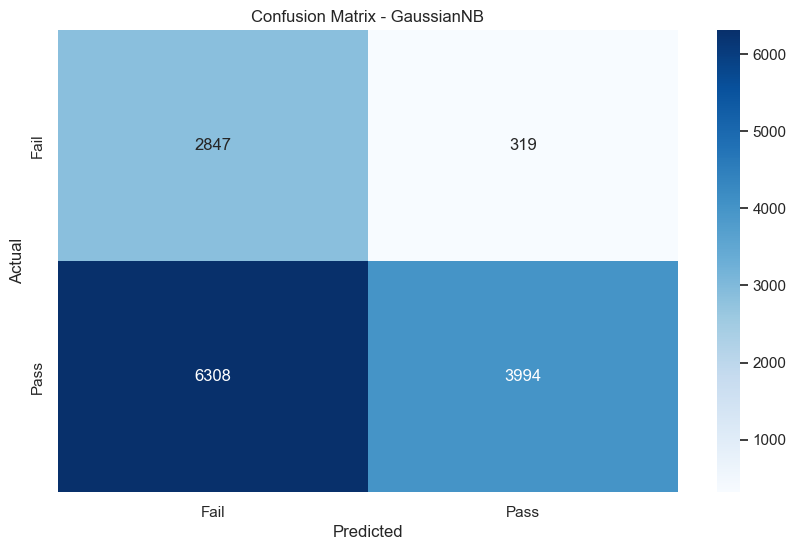

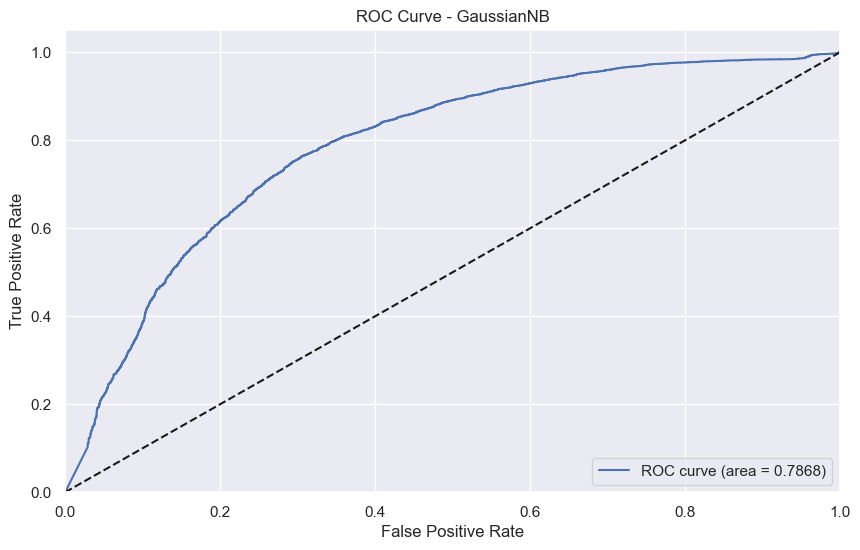

In [ ]:

# Prepare data for classification using final_df_cat
X = final_df_cat.drop(['final_score', 'final_result'], axis=1)
y = final_df_cat['final_result']  # Using final_result as the target for classification

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Handle missing values
imputer = SimpleImputer(strategy='mean')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classification models to evaluate
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'GaussianNB': GaussianNB(),
}

# Initialize results dictionary
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Train and evaluate each model
for name, model in models.items():
    # Create pipeline with preprocessing
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('imputer', imputer),
        ('classifier', model)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1] 
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Pass')
    recall = recall_score(y_test, y_pred, pos_label='Pass')
    sensitivity = recall  # Sensitivity is the same as recall
    
    # Calculate specificity (true negative rate)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    
    f1 = f1_score(y_test, y_pred, pos_label='Pass')
    
    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_test == 'Pass', y_pred_proba)
    
    # Store results
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    
    # Print individual model results
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall/Sensitivity: {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    # Plot confusion matrix
    plt.figure(figsize=(10, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Fail', 'Pass'], 
                yticklabels=['Fail', 'Pass'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    fpr, tpr, _ = roc_curve(y_test == 'Pass', y_pred_proba)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc="lower right")
    plt.show()




Testing: No Preprocessing with All Features
Random Forest with No Preprocessing and All Features Results:
Accuracy: 0.9491
Precision: 0.9478
Recall/Sensitivity: 0.9879
Specificity: 0.8231
F1 Score: 0.9674
ROC AUC: 0.9859

Classification Report:
              precision    recall  f1-score   support

        Fail       0.95      0.82      0.88      3166
        Pass       0.95      0.99      0.97     10302

    accuracy                           0.95     13468
   macro avg       0.95      0.91      0.93     13468
weighted avg       0.95      0.95      0.95     13468



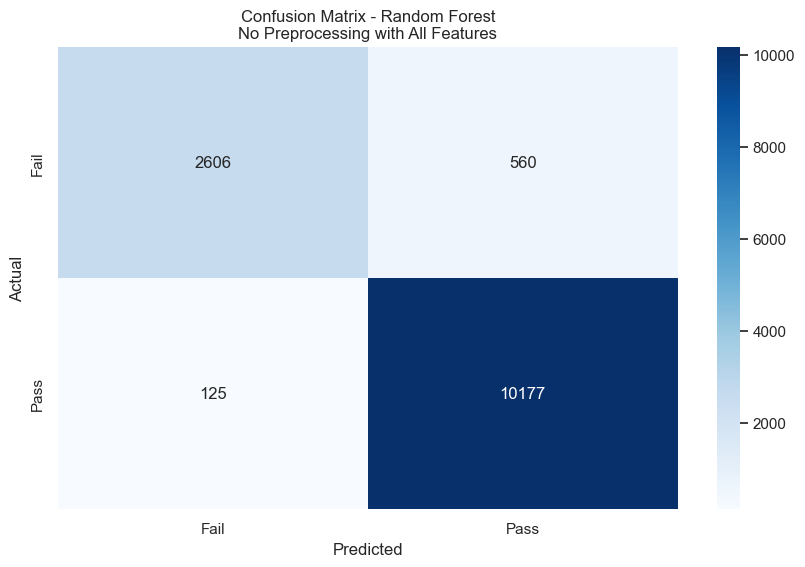

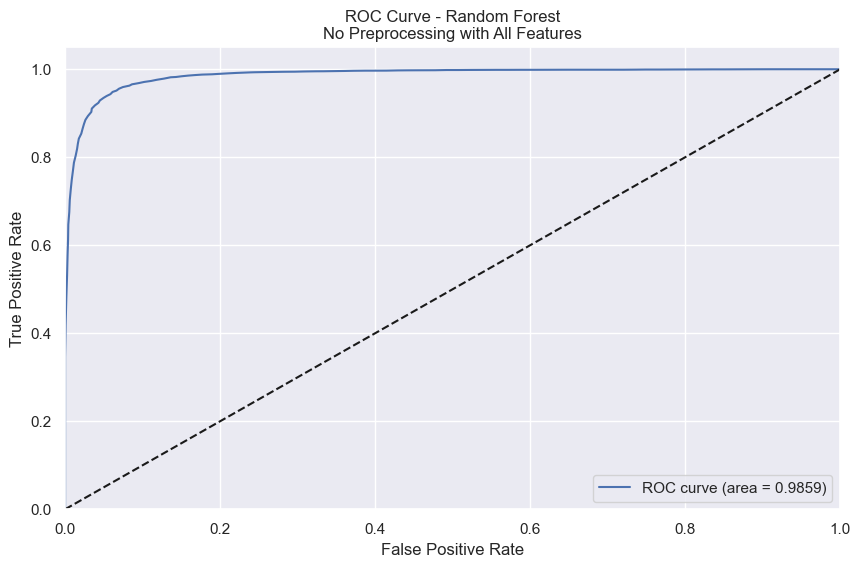



Testing: No Preprocessing with Original Features Only
Random Forest with No Preprocessing and Original Features Only Results:
Accuracy: 0.8600
Precision: 0.8704
Recall/Sensitivity: 0.9599
Specificity: 0.5351
F1 Score: 0.9130
ROC AUC: 0.8983

Classification Report:
              precision    recall  f1-score   support

        Fail       0.80      0.54      0.64      3166
        Pass       0.87      0.96      0.91     10302

    accuracy                           0.86     13468
   macro avg       0.84      0.75      0.78     13468
weighted avg       0.85      0.86      0.85     13468



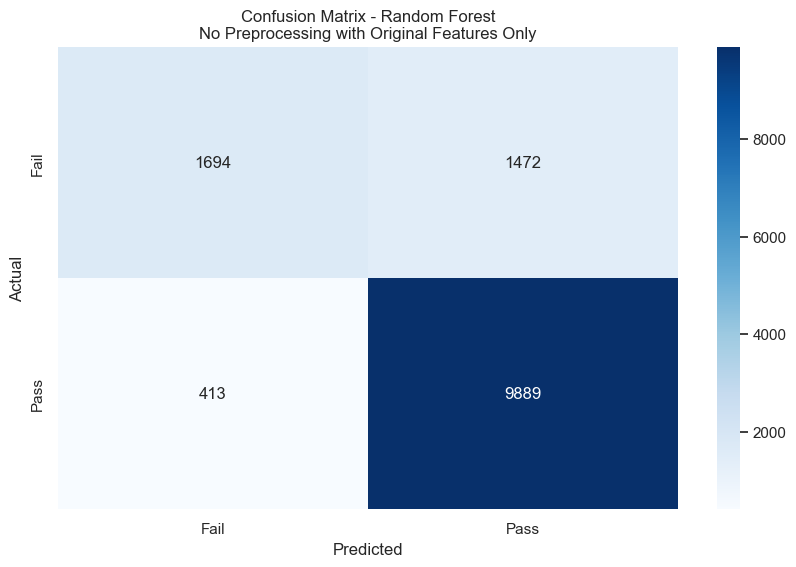

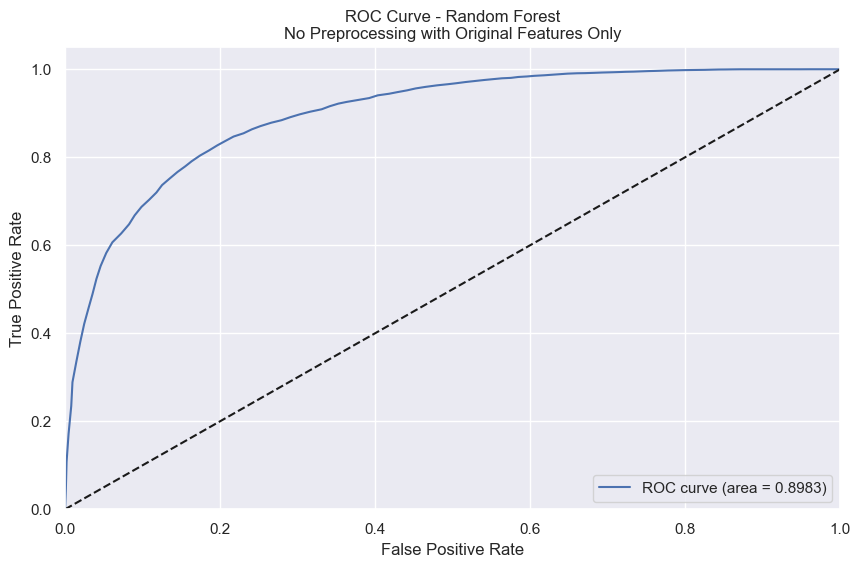



Testing: No Preprocessing with Engineered Features Only
Random Forest with No Preprocessing and Engineered Features Only Results:
Accuracy: 0.9728
Precision: 0.9723
Recall/Sensitivity: 0.9926
Specificity: 0.9081
F1 Score: 0.9824
ROC AUC: 0.9943

Classification Report:
              precision    recall  f1-score   support

        Fail       0.97      0.91      0.94      3166
        Pass       0.97      0.99      0.98     10302

    accuracy                           0.97     13468
   macro avg       0.97      0.95      0.96     13468
weighted avg       0.97      0.97      0.97     13468



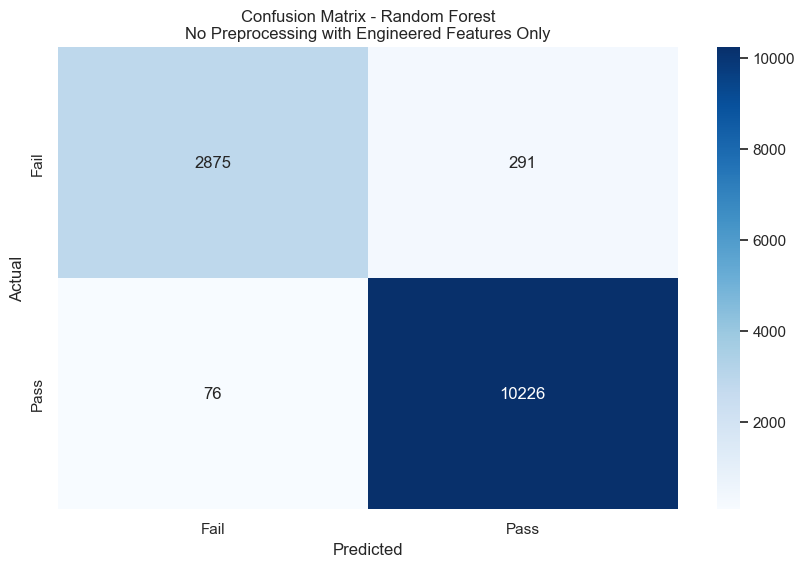

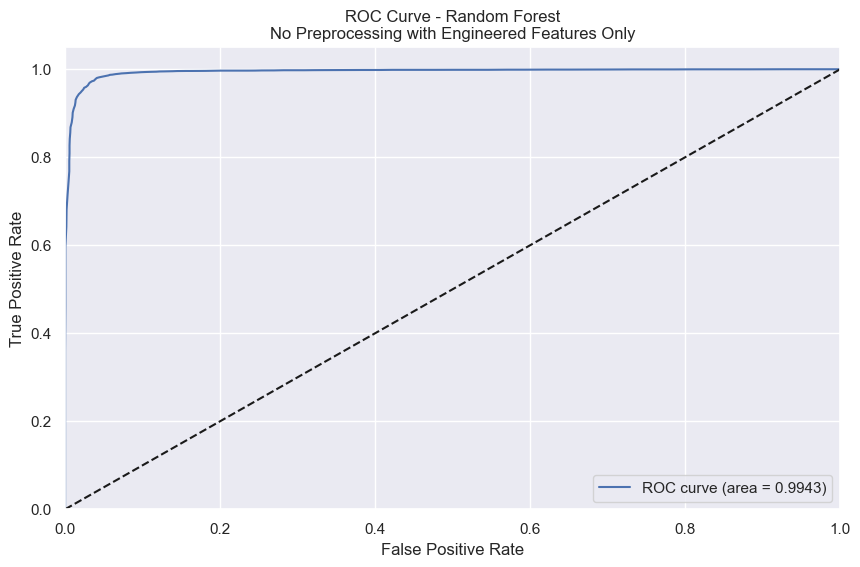



Testing: With Scaling with All Features
Random Forest with With Scaling and All Features Results:
Accuracy: 0.9533
Precision: 0.9519
Recall/Sensitivity: 0.9889
Specificity: 0.8373
F1 Score: 0.9701
ROC AUC: 0.9886

Classification Report:
              precision    recall  f1-score   support

        Fail       0.96      0.84      0.89      3166
        Pass       0.95      0.99      0.97     10302

    accuracy                           0.95     13468
   macro avg       0.96      0.91      0.93     13468
weighted avg       0.95      0.95      0.95     13468



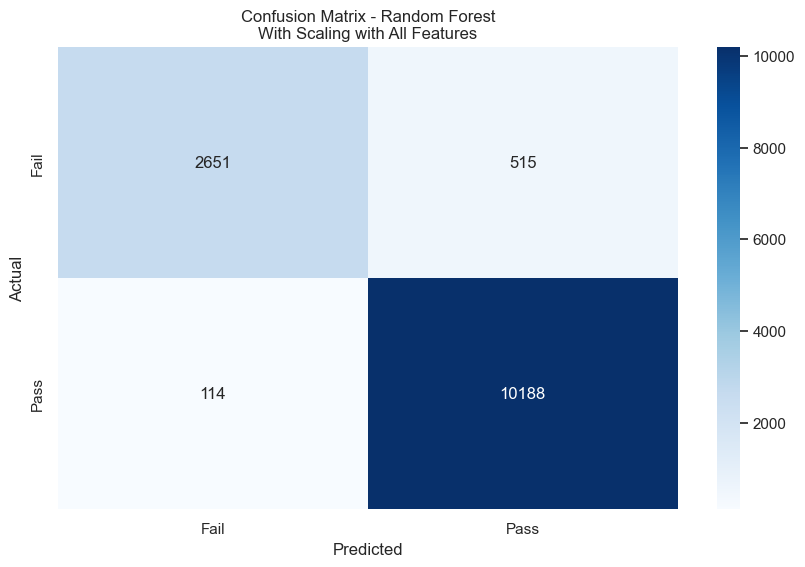

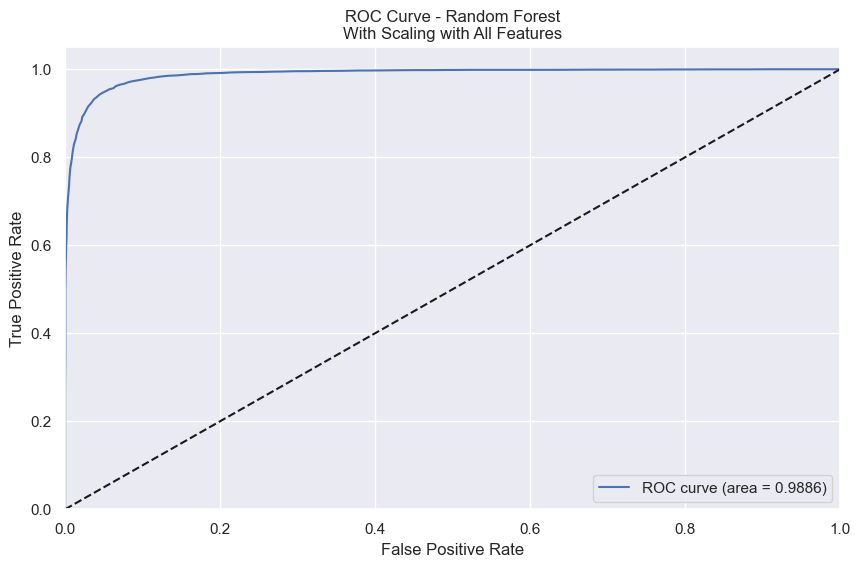



Testing: With Scaling with Original Features Only
Random Forest with With Scaling and Original Features Only Results:
Accuracy: 0.8599
Precision: 0.8703
Recall/Sensitivity: 0.9599
Specificity: 0.5344
F1 Score: 0.9129
ROC AUC: 0.8982

Classification Report:
              precision    recall  f1-score   support

        Fail       0.80      0.53      0.64      3166
        Pass       0.87      0.96      0.91     10302

    accuracy                           0.86     13468
   macro avg       0.84      0.75      0.78     13468
weighted avg       0.85      0.86      0.85     13468



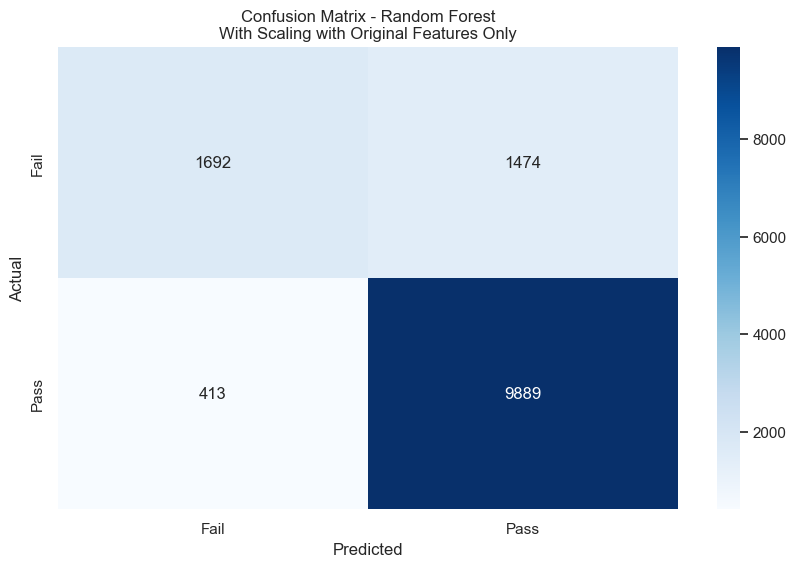

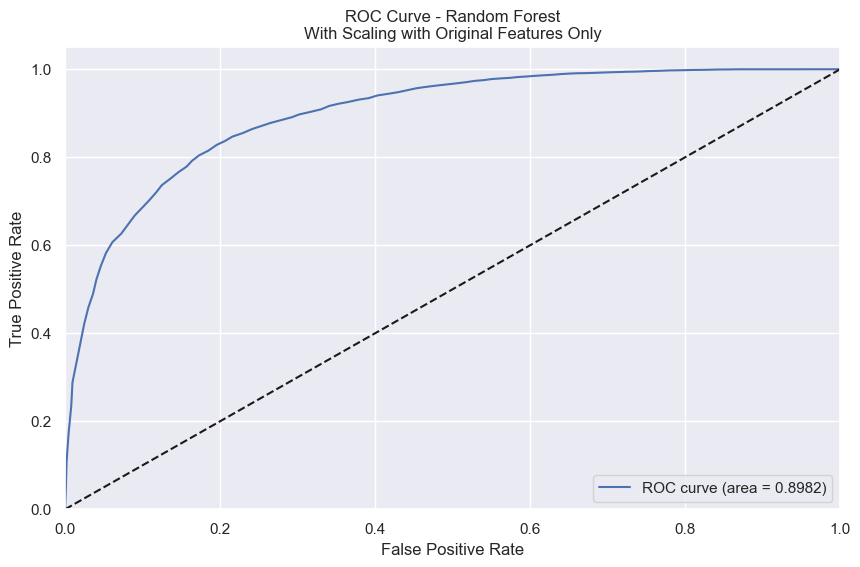



Testing: With Scaling with Engineered Features Only
Random Forest with With Scaling and Engineered Features Only Results:
Accuracy: 0.9789
Precision: 0.9796
Recall/Sensitivity: 0.9931
Specificity: 0.9327
F1 Score: 0.9863
ROC AUC: 0.9956

Classification Report:
              precision    recall  f1-score   support

        Fail       0.98      0.93      0.95      3166
        Pass       0.98      0.99      0.99     10302

    accuracy                           0.98     13468
   macro avg       0.98      0.96      0.97     13468
weighted avg       0.98      0.98      0.98     13468



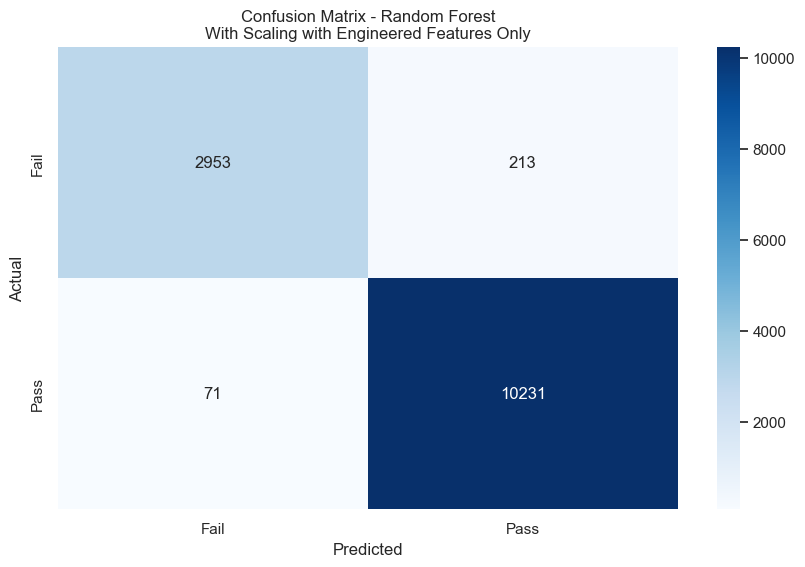

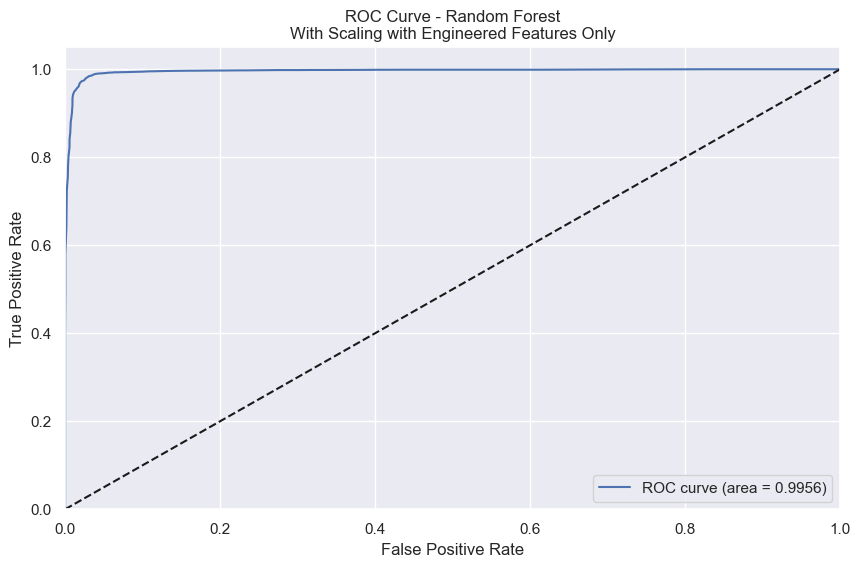



Testing: With Normalization with All Features
Random Forest with With Normalization and All Features Results:
Accuracy: 0.9529
Precision: 0.9515
Recall/Sensitivity: 0.9888
Specificity: 0.8361
F1 Score: 0.9698
ROC AUC: 0.9887

Classification Report:
              precision    recall  f1-score   support

        Fail       0.96      0.84      0.89      3166
        Pass       0.95      0.99      0.97     10302

    accuracy                           0.95     13468
   macro avg       0.95      0.91      0.93     13468
weighted avg       0.95      0.95      0.95     13468



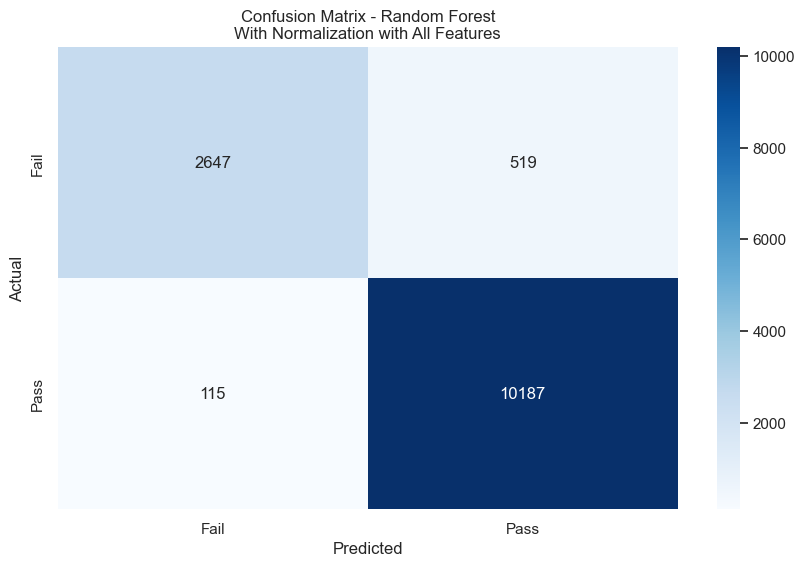

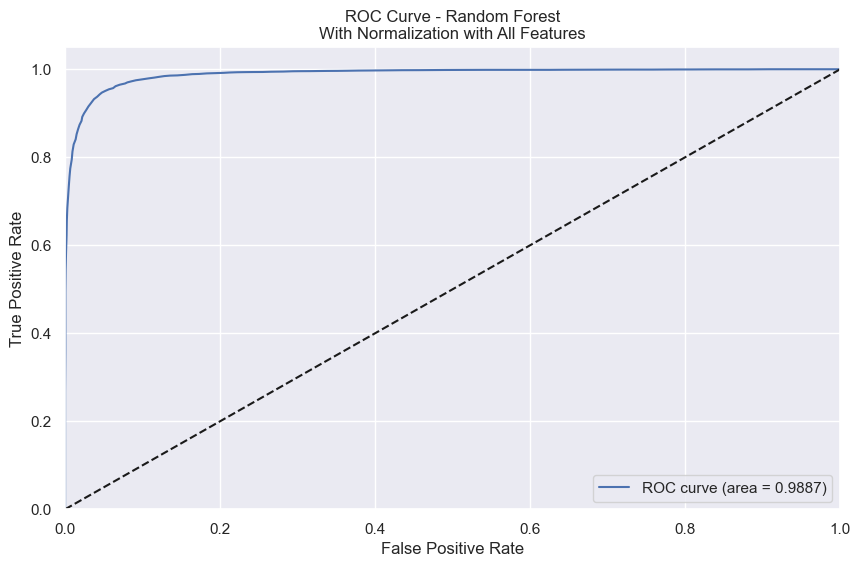



Testing: With Normalization with Original Features Only
Random Forest with With Normalization and Original Features Only Results:
Accuracy: 0.8605
Precision: 0.8708
Recall/Sensitivity: 0.9601
Specificity: 0.5363
F1 Score: 0.9133
ROC AUC: 0.8984

Classification Report:
              precision    recall  f1-score   support

        Fail       0.81      0.54      0.64      3166
        Pass       0.87      0.96      0.91     10302

    accuracy                           0.86     13468
   macro avg       0.84      0.75      0.78     13468
weighted avg       0.86      0.86      0.85     13468



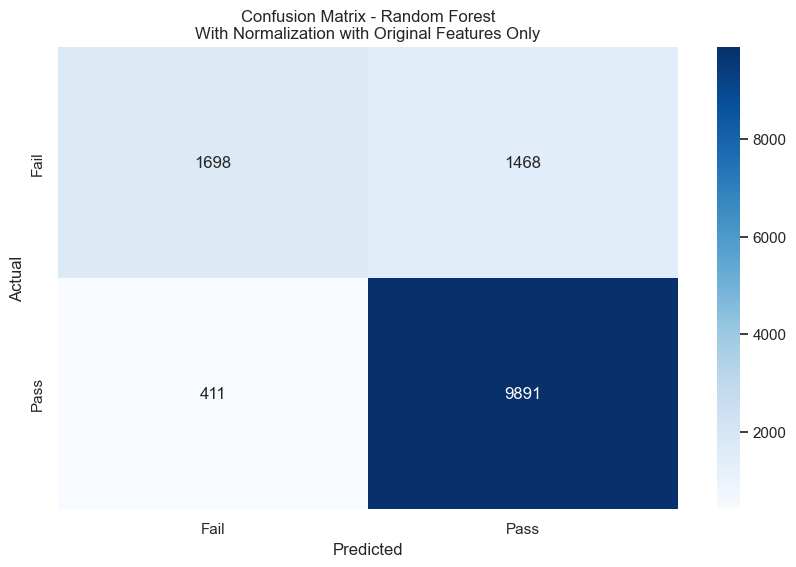

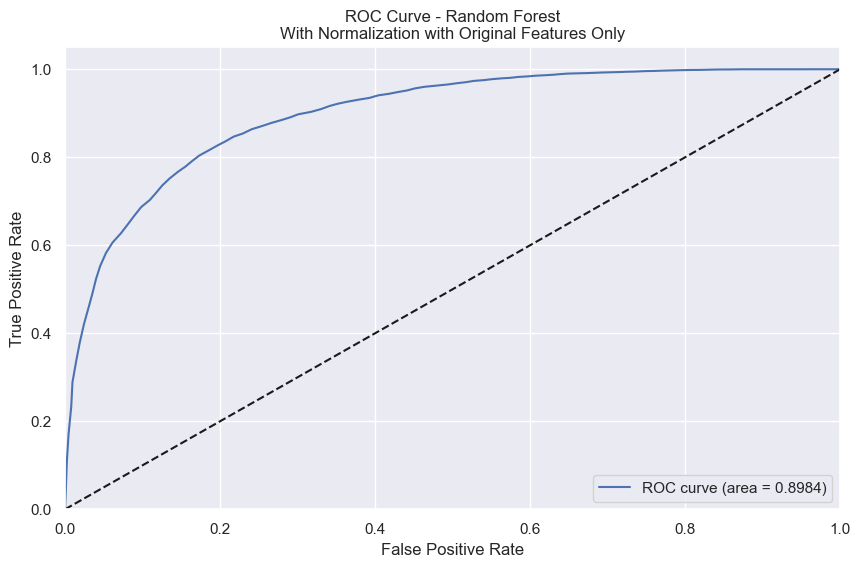



Testing: With Normalization with Engineered Features Only
Random Forest with With Normalization and Engineered Features Only Results:
Accuracy: 0.9790
Precision: 0.9796
Recall/Sensitivity: 0.9932
Specificity: 0.9327
F1 Score: 0.9864
ROC AUC: 0.9955

Classification Report:
              precision    recall  f1-score   support

        Fail       0.98      0.93      0.95      3166
        Pass       0.98      0.99      0.99     10302

    accuracy                           0.98     13468
   macro avg       0.98      0.96      0.97     13468
weighted avg       0.98      0.98      0.98     13468



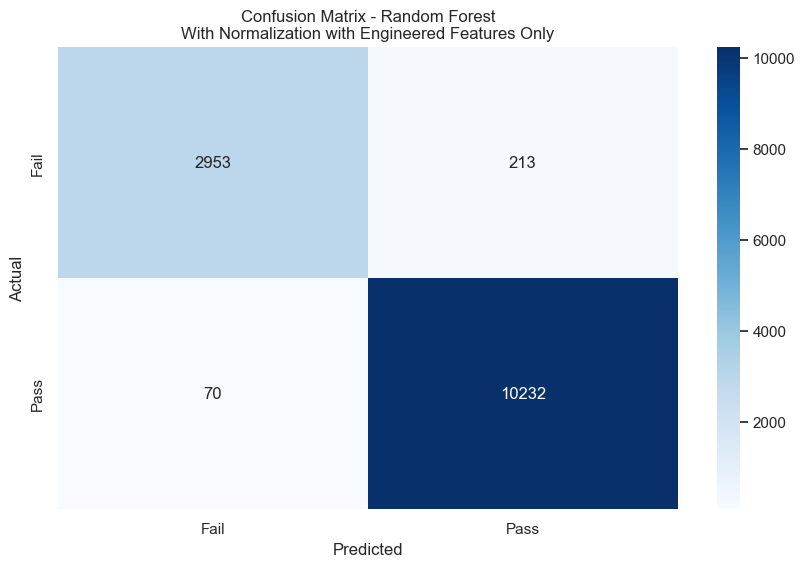

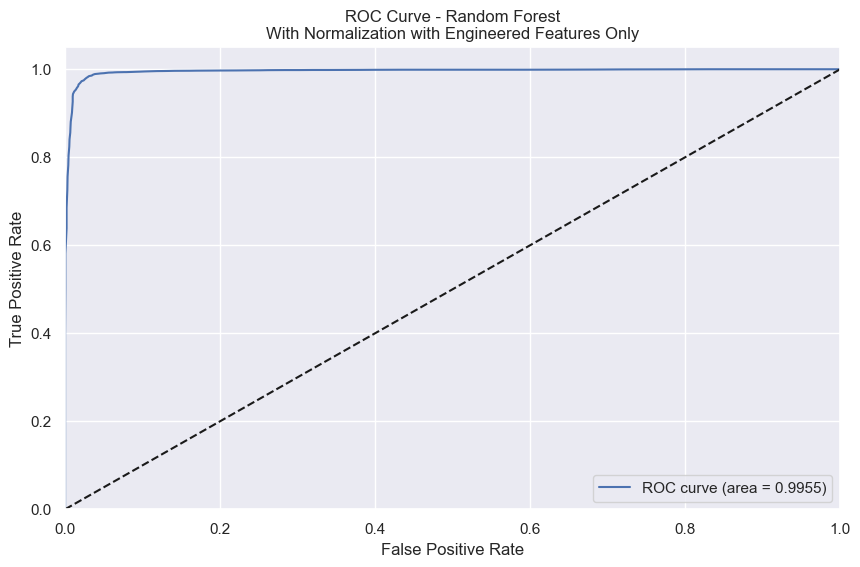


Summary of Random Forest Performance with Different Preprocessing Strategies:
             Strategy               Feature Set  Accuracy  Precision  \
0    No Preprocessing              All Features  0.949139   0.947844   
1    No Preprocessing    Original Features Only  0.860039   0.870434   
2    No Preprocessing  Engineered Features Only  0.972750   0.972331   
3        With Scaling              All Features  0.953297   0.951883   
4        With Scaling    Original Features Only  0.859890   0.870281   
5        With Scaling  Engineered Features Only  0.978913   0.979606   
6  With Normalization              All Features  0.952925   0.951523   
7  With Normalization    Original Features Only  0.860484   0.870763   
8  With Normalization  Engineered Features Only  0.978987   0.979607   

     Recall  F1 Score   ROC AUC  
0  0.987866  0.967441  0.985948  
1  0.959911  0.912985  0.898272  
2  0.992623  0.982372  0.994286  
3  0.988934  0.970055  0.988618  
4  0.959911  0.912901  0.89819

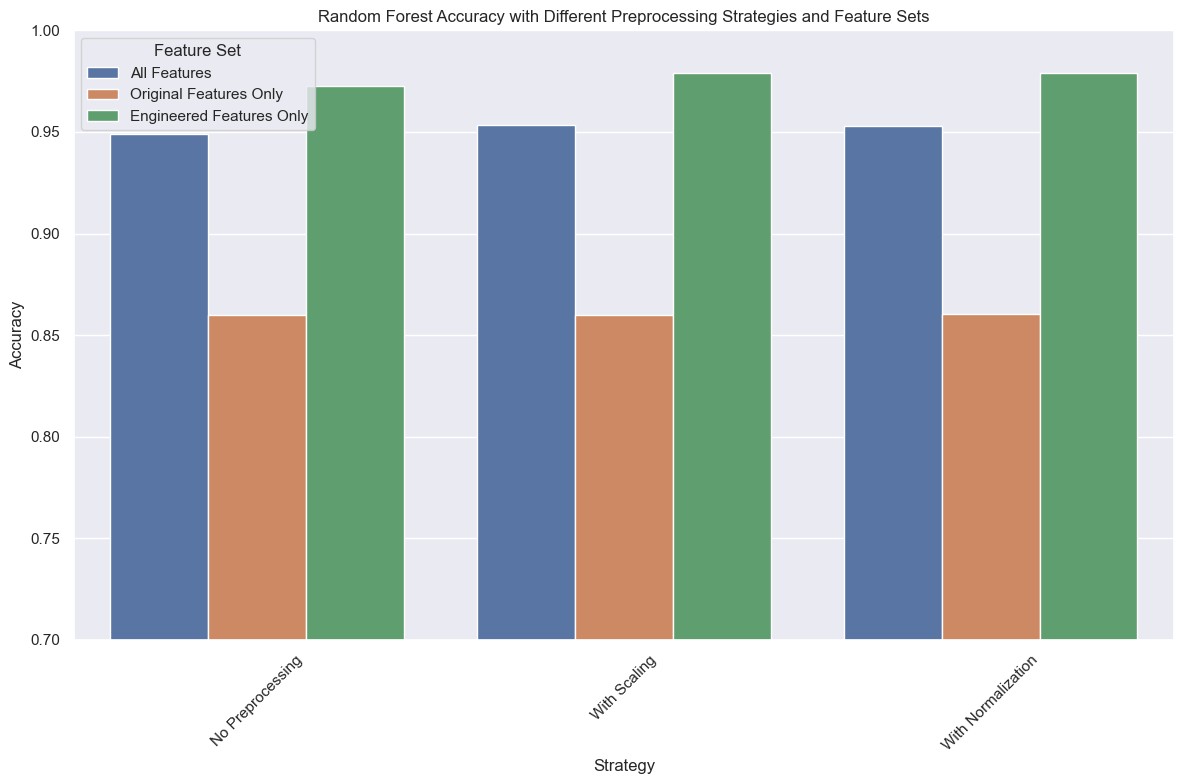

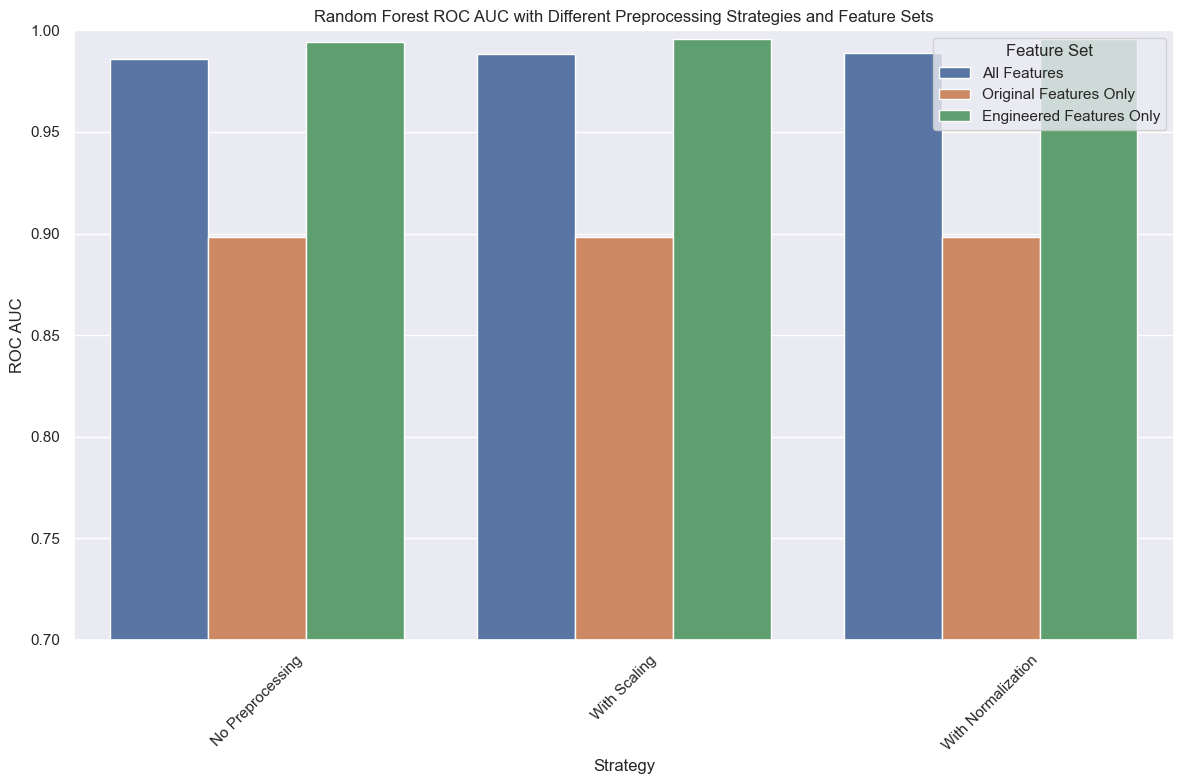

In [ ]:
# Define categorical features
cat_features = ['code_module', 'code_presentation', 'gender', 'region', 
                'highest_education', 'imd_band', 'age_band', 'disability', 
                'final_result', 'assessment_type', 'module_presentation', 
                'education_age', 'has_disability', 'is_first_attempt', 
                'submitted_late']

# Check if the features exist in the dataset
cat_features = [feature for feature in cat_features if feature in X_train.columns]

# If no categorical features are found, create an empty list
if not cat_features:
    cat_features = []
    print("No categorical features found in the dataset.")

    
# Prepare data for classification using final_df_cat
X = final_df_cat.drop(['final_score', 'final_result'], axis=1)
y = final_df_cat['final_result']  # Using final_result as the target for classification

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different preprocessing strategies to test
preprocessing_strategies = {
    'No Preprocessing': None,
    'With Scaling': StandardScaler(),
    'With Normalization': MinMaxScaler(),
}

# Define feature sets to test
original_features = X.columns[:21].tolist()  # First 21 columns are original
engineered_features = [col for col in X.columns if col not in original_features]

feature_sets = {
    'All Features': X.columns.tolist(),
    'Original Features Only': original_features,
    'Engineered Features Only': engineered_features
}

# Initialize results dictionary
results = {
    'Strategy': [],
    'Feature Set': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}

# Test Random Forest with different preprocessing strategies and feature sets
for strategy_name, scaler in preprocessing_strategies.items():
    for feature_set_name, features in feature_sets.items():
        print(f"\n\nTesting: {strategy_name} with {feature_set_name}")
        
        # Select features
        X_train_subset = X_train[features]
        X_test_subset = X_test[features]
        
        # Apply preprocessing if needed
        if scaler is not None:
            # Only scale numerical features
            num_features = [f for f in features if f in numerical_cols]
            cat_features = [f for f in features if f in categorical_cols]
            
            if num_features:
                X_train_num = scaler.fit_transform(X_train_subset[num_features])
                X_test_num = scaler.transform(X_test_subset[num_features])
                
                # Convert back to DataFrame
                X_train_num_df = pd.DataFrame(X_train_num, columns=num_features, index=X_train_subset.index)
                X_test_num_df = pd.DataFrame(X_test_num, columns=num_features, index=X_test_subset.index)
                
                # Combine with categorical features
                if cat_features:
                    X_train_subset = pd.concat([X_train_num_df, X_train_subset[cat_features]], axis=1)
                    X_test_subset = pd.concat([X_test_num_df, X_test_subset[cat_features]], axis=1)
                else:
                    X_train_subset = X_train_num_df
                    X_test_subset = X_test_num_df
        
        # Handle categorical features
        if cat_features:
            # Create a preprocessing pipeline for categorical features
            preprocessor = ColumnTransformer(
                transformers=[
                    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
                ],
                remainder='passthrough'
            )
            
            X_train_processed = preprocessor.fit_transform(X_train_subset)
            X_test_processed = preprocessor.transform(X_test_subset)
        else:
            X_train_processed = X_train_subset
            X_test_processed = X_test_subset
        
        # Train Random Forest
        rf = RandomForestClassifier(random_state=42)
        rf.fit(X_train_processed, y_train)
        
        # Make predictions
        y_pred = rf.predict(X_test_processed)
        
        # For ROC AUC, we need probability predictions
        if hasattr(rf, "predict_proba"):
            y_pred_proba = rf.predict_proba(X_test_processed)[:, 1]
        else:
            y_pred_proba = y_pred
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, pos_label='Pass')
        recall = recall_score(y_test, y_pred, pos_label='Pass')
        f1 = f1_score(y_test, y_pred, pos_label='Pass')
        
        # Calculate specificity (true negative rate)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn + fp)
        
        # Calculate ROC AUC
        roc_auc = roc_auc_score(y_test == 'Pass', y_pred_proba)
        
        # Store results
        results['Strategy'].append(strategy_name)
        results['Feature Set'].append(feature_set_name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1 Score'].append(f1)
        results['ROC AUC'].append(roc_auc)
        
        # Print results
        print(f"Random Forest with {strategy_name} and {feature_set_name} Results:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall/Sensitivity: {recall:.4f}")
        print(f"Specificity: {specificity:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}")
        
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        
        # Plot confusion matrix
        plt.figure(figsize=(10, 6))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Fail', 'Pass'], 
                    yticklabels=['Fail', 'Pass'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix - Random Forest\n{strategy_name} with {feature_set_name}')
        plt.show()
        
        # Plot ROC curve
        plt.figure(figsize=(10, 6))
        fpr, tpr, _ = roc_curve(y_test == 'Pass', y_pred_proba)
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - Random Forest\n{strategy_name} with {feature_set_name}')
        plt.legend(loc="lower right")
        plt.show()

# Create a summary DataFrame and visualize the results
results_df = pd.DataFrame(results)
print("\nSummary of Random Forest Performance with Different Preprocessing Strategies:")
print(results_df)

# Plot comparison of accuracy across different strategies and feature sets
plt.figure(figsize=(12, 8))
sns.barplot(x='Strategy', y='Accuracy', hue='Feature Set', data=results_df)
plt.title('Random Forest Accuracy with Different Preprocessing Strategies and Feature Sets')
plt.ylim(0.7, 1.0)  # Adjust as needed
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot comparison of ROC AUC across different strategies and feature sets
plt.figure(figsize=(12, 8))
sns.barplot(x='Strategy', y='ROC AUC', hue='Feature Set', data=results_df)
plt.title('Random Forest ROC AUC with Different Preprocessing Strategies and Feature Sets')
plt.ylim(0.7, 1.0)  # Adjust as needed
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Clustring


Adjusted Rand Index (ARI): -0.0123

Adjusted Rand Index (GMM): -0.0025


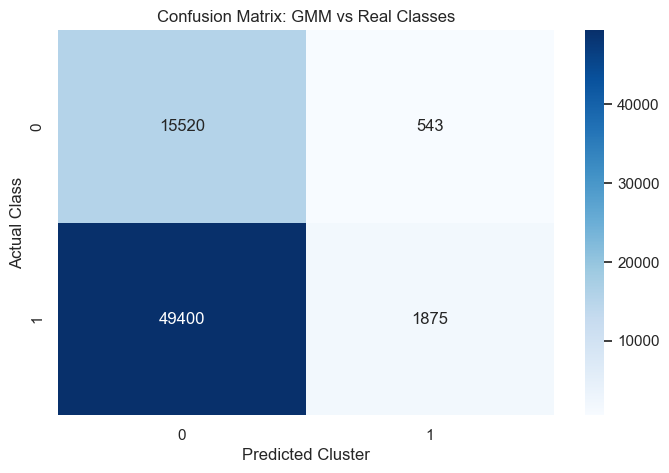

In [80]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data (no target 'y' now)
X_cluster = final_df_cat.drop(['final_score', 'final_result'], axis=1)
true_labels = final_df_cat['final_result'].map({'Fail': 0, 'Pass': 1}).values

# Identify columns
categorical_cols = X_cluster.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X_cluster.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing pipelines
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),   # Fill NA in numeric with mean
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill NA in categorical with most frequent
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Full preprocessor
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Preprocess the data
X_processed = preprocessor.fit_transform(X_cluster)

# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_processed)

# Evaluation
ari = adjusted_rand_score(true_labels, cluster_labels)
print(f"\nAdjusted Rand Index (ARI): {ari:.4f}")

from sklearn.mixture import GaussianMixture

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42)
cluster_labels = gmm.fit_predict(X_processed)

# Evaluation
ari = adjusted_rand_score(true_labels, cluster_labels)
print(f"\nAdjusted Rand Index (GMM): {ari:.4f}")

# Confusion matrix
cm = confusion_matrix(true_labels, cluster_labels)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Cluster')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix: GMM vs Real Classes')
plt.show()



Adjusted Rand Index : 0.001
Adjusted Mutual Info: -0.000
Best-mapping accuracy (clusters → labels): 0.742


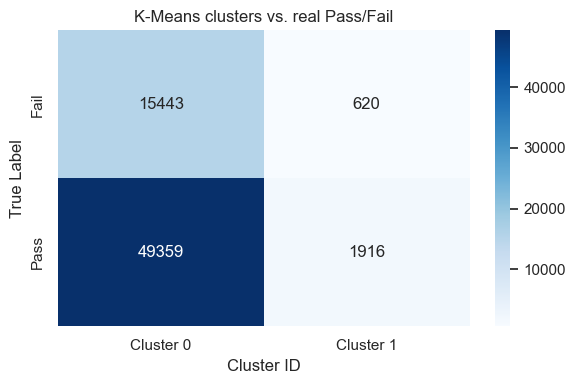

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import (
    adjusted_rand_score,
    adjusted_mutual_info_score,
    confusion_matrix,
    accuracy_score,
)
from scipy.optimize import linear_sum_assignment



label_map = {"Fail": 0, "Pass": 1}
y = final_df_cat["final_result"].map(label_map).to_numpy()

X = final_df_cat.drop(columns=["final_result", "final_score"])

cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()


preprocessor = ColumnTransformer(
    [
        ("num", Pipeline([("imp", SimpleImputer()), ("sc", StandardScaler())]), num_cols),
        (
            "cat",
            Pipeline(
                [
                    ("imp", SimpleImputer(strategy="most_frequent")),
                    ("ohe", OneHotEncoder(handle_unknown="ignore")),
                ]
            ),
            cat_cols,
        ),
    ]
)


kmeans = KMeans(n_clusters=len(np.unique(y)), random_state=42)

pipe = Pipeline([("prep", preprocessor), ("cluster", kmeans)])
cluster_labels = pipe.fit_predict(X)


ari = adjusted_rand_score(y, cluster_labels)
ami = adjusted_mutual_info_score(y, cluster_labels)

cm = confusion_matrix(y, cluster_labels)

row_ind, col_ind = linear_sum_assignment(-cm)
mapping = {c: r for r, c in zip(row_ind, col_ind)}
mapped_preds = np.vectorize(mapping.get)(cluster_labels)
acc = accuracy_score(y, mapped_preds)

print(f"Adjusted Rand Index : {ari:.3f}")
print(f"Adjusted Mutual Info: {ami:.3f}")
print(f"Best-mapping accuracy (clusters → labels): {acc:.3f}")

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    yticklabels=["Fail", "Pass"],
    xticklabels=[f"Cluster {i}" for i in range(cm.shape[1])],
)
plt.xlabel("Cluster ID")
plt.ylabel("True Label")
plt.title("K-Means clusters vs. real Pass/Fail")
plt.tight_layout()
plt.show()


In [83]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from scipy.optimize import linear_sum_assignment

# ----- Re-use the earlier preprocessor (num + cat) -----------------
prepped = preprocessor.fit_transform(X)    # numpy array

# ----- Dimensionality reduction (keep 95 % variance) ---------------
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(prepped)

# ----- Hierarchical clustering (Ward) ------------------------------
agg = AgglomerativeClustering(n_clusters=2, linkage="ward")
clabels = agg.fit_predict(X_pca)

# ----- Metrics ------------------------------------------------------
cm = confusion_matrix(y, clabels)
row, col = linear_sum_assignment(-cm)
mapped = np.vectorize({c: r for r, c in zip(row, col)}.get)(clabels)
print("ARI ", adjusted_rand_score(y, clabels))
print("AMI ", adjusted_mutual_info_score(y, clabels))
print("Acc ", accuracy_score(y, mapped))


ARI  0.15280918261676887
AMI  0.0601062884557857
Acc  0.7703376993673706
